# Imports and variables

In [1]:
import pickle
import numpy as np
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from src.results import get_panel_data, get_best_scores_table, get_scores_skills_table

In [2]:
ens_method = "rand_init"
ens_method_ls = [
    "rand_init",
    "bagging",
    "batchensemble",
    "bayesian",
    "mc_dropout",
    "variational_dropout",
    "concrete_dropout",
]
ens_method_labels = {
    "rand_init": "Naive",
    "bagging": "Bagging",
    "batchensemble": "BatchEns.",
    "bayesian": "Bayesian",
    "mc_dropout": "MC Dropout",
    "variational_dropout": "Var. Drop.",
    "concrete_dropout": "Conc. Drop.",
}
dataset_ls = [
    "boston",
    "concrete",
    "energy",
    "kin8nm",
    "naval",
    "power",
    "protein",
    "wine",
    "yacht",
]
dataset_labels = {
    "boston": "Boston Housing \n (N=506)",
    "concrete": "Concrete Strength \n (N=1030)",
    "energy": "Energy Efficiency \n (N=768)",
    "kin8nm": "Kin8nm \n (N=8192)",
    "naval": "Naval Propulsion \n (N=11934)",
    "power": "Power Plant \n (N=9568)",
    "protein": "Protein Structure \n (N=45730)",
    "wine": "Red Wine Quality \n (N=1599)",
    "yacht": "Yacht Hydrodynamics \n (N=308)"
}
agg_labels = {
    "lp": r"$LP$",
    "vi": r"$V_0^=$",
    "vi-a": r"$V_a^=$",
    "vi-w": r"$V_0^w$",
    "vi-aw": r"$V_a^w$",
}

In [3]:
# Get colors
agg_cols = sns.color_palette("Dark2", 8, as_cmap=True)
# Colors of aggregation methods
agg_col = {
    "lp": agg_cols.colors[4],  # type: ignore
    "vi": agg_cols.colors[5],  # type: ignore
    "vi-a": agg_cols.colors[2],  # type: ignore
    "vi-w": agg_cols.colors[0],  # type: ignore
    "vi-aw": agg_cols.colors[3],  # type: ignore
    "ens": agg_cols.colors[7],  # type: ignore
    "opt": agg_cols.colors[1],  # type: ignore
}

greens = sns.color_palette("Greens", 2, as_cmap=False)
blues = sns.color_palette("Blues", 1)
purples = sns.color_palette("Purples", 1)
reds = sns.color_palette("Reds", 3)
ens_col = {
    "rand_init": greens[1], #multi_model_cols.colors[0],  # type: ignore
    "bagging": greens[0], #multi_model_cols.colors[1],  # type: ignore
    "batchensemble": blues[0], #multi_model_cols.colors[3],  # type: ignore
    "bayesian": purples[0], #multi_model_cols.colors[8],  # type: ignore
    "mc_dropout": reds[2], #dropout_cols.colors[14],  # type: ignore
    "variational_dropout": reds[1], #dropout_cols.colors[16],  # type: ignore
    "concrete_dropout": reds[0], #dropout_cols.colors[15],  # type: ignore
}

# KIT colors
kit_cols_dict = {
    "green": "#00876C",
    "blue": "#4664AA",
    "black": "#000000",
    "grey": "#404040",
}

In [4]:
score_vec = ["crps", "crpss", "me", "lgt", "cov", "a", "w"]
nn_vec = ["drn", "bqn"]
n_ens_vec = np.arange(start=2, stop=10 + 2, step=2)
agg_meths = ["lp", "vi", "vi-a", "vi-w", "vi-aw"]

In [5]:
export = True
save_dir = os.path.join("plots", "results")

# Get score and skill data

In [6]:
# Get skills table
data_path = os.path.join("..", "..", "04_Experiments", f"Normal")
df_scores, df_skills = get_scores_skills_table(data_path, dataset_ls, score_vec, nn_vec, n_ens_vec, agg_meths, ens_method_ls)

# Add skill difference columns
for idx in range(len(n_ens_vec)):
    if idx == 0:
        continue
    n_ens = n_ens_vec[idx]
    n_ens_prev = n_ens_vec[idx-1]
    df_skills[f"diff_skill_{n_ens}"] = df_skills[f"skill_{n_ens}"] - df_skills[f"skill_{n_ens_prev}"]

df_skills.head()

,ens_method,dataset,nn,agg,skill_2,skill_4,skill_6,skill_8,skill_10,avg_skill,diff_skill_4,diff_skill_6,diff_skill_8,diff_skill_10
0,rand_init,boston,drn,lp,0.289200,0.215500,0.582567,0.105138,0.284955,0.295472,-0.073700,0.367067,-0.477429,0.179817
1,rand_init,boston,drn,vi,0.275882,0.322590,0.413210,0.408691,0.419660,0.368007,0.046708,0.090620,-0.004519,0.010969
2,rand_init,boston,drn,vi-a,-0.478778,-0.475159,-0.386170,-0.379353,-0.371357,-0.418163,0.003618,0.088989,0.006817,0.007996
3,rand_init,boston,drn,vi-w,-0.600923,-0.582863,-0.499349,-0.495916,-0.486431,-0.533096,0.018060,0.083515,0.003432,0.009485
4,rand_init,boston,drn,vi-aw,-0.849472,-0.867536,-0.835119,-0.829590,-0.808123,-0.837968,-0.018064,0.032418,0.005529,0.021467


In [7]:
df_scores.head()

,ens_method,dataset,nn,agg,score_2,score_4,score_6,score_8,score_10,avg_score
0,rand_init,boston,drn,lp,1.880196,1.882215,1.874762,1.884769,1.880862,1.880561
1,rand_init,boston,drn,vi,1.880447,1.880195,1.877956,1.879042,1.878322,1.879192
2,rand_init,boston,drn,vi-a,1.894677,1.895243,1.893030,1.893910,1.893242,1.894020
3,rand_init,boston,drn,vi-w,1.896980,1.897274,1.895165,1.896109,1.895413,1.896188
4,rand_init,boston,drn,vi-aw,1.901667,1.902644,1.901496,1.902405,1.901480,1.901939


In [8]:
# Get best scores per dataset
best_scores = df_scores.sort_values(["dataset", "score_10"], ascending=True).groupby("dataset").head(1)
best_scores.head(10)

,ens_method,dataset,nn,agg,score_2,score_4,score_6,score_8,score_10,avg_score
6,rand_init,boston,bqn,lp,1.785155,1.773156,1.768902,1.770038,1.766361,1.772722
18,rand_init,concrete,bqn,lp,4.202609,4.188969,4.176272,4.179591,4.174679,4.184424
30,rand_init,energy,bqn,lp,1.458814,1.460001,1.461700,1.456971,1.456299,1.458757
370,bayesian,kin8nm,bqn,vi-aw,0.045215,0.044000,0.043603,0.043392,0.043293,0.043901
156,bagging,naval,drn,lp,0.001407,0.001384,0.001378,0.001380,0.001380,0.001386
388,bayesian,power,drn,vi-aw,2.401226,2.398869,2.398216,2.397538,2.397257,2.398621
188,bagging,protein,bqn,vi-a,2.291736,2.275833,2.270599,2.265791,2.264635,2.273719
91,rand_init,wine,bqn,vi,0.353703,0.352895,0.352902,0.352652,0.352701,0.352971
318,batchensemble,yacht,bqn,lp,0.729790,0.694926,0.702015,0.701502,0.697991,0.705245


In [9]:
best_scores[best_scores["dataset"] == "boston"]["score_10"]

6    1.766361
Name: score_10, dtype: float64

In [10]:
# Get best scores per dataset and NN type
best_scores_nn = df_scores.sort_values(["dataset", "nn", "score_10"], ascending=True).groupby(["dataset", "nn"]).head(1)
best_scores_nn.head(20)

,ens_method,dataset,nn,agg,score_2,score_4,score_6,score_8,score_10,avg_score
6,rand_init,boston,bqn,lp,1.785155,1.773156,1.768902,1.770038,1.766361,1.772722
1,rand_init,boston,drn,vi,1.880447,1.880195,1.877956,1.879042,1.878322,1.879192
18,rand_init,concrete,bqn,lp,4.202609,4.188969,4.176272,4.179591,4.174679,4.184424
228,batchensemble,concrete,drn,lp,4.997132,4.906032,4.915001,4.916186,4.909305,4.928731
30,rand_init,energy,bqn,lp,1.458814,1.460001,1.461700,1.456971,1.456299,1.458757
27,rand_init,energy,drn,vi-w,1.563490,1.557389,1.555607,1.556519,1.556781,1.557957
370,bayesian,kin8nm,bqn,vi-aw,0.045215,0.044000,0.043603,0.043392,0.043293,0.043901
688,concrete_dropout,kin8nm,drn,vi-aw,0.047664,0.046642,0.046209,0.046010,0.045894,0.046484
162,bagging,naval,bqn,lp,0.002336,0.002294,0.002360,0.002360,0.002371,0.002344
156,bagging,naval,drn,lp,0.001407,0.001384,0.001378,0.001380,0.001380,0.001386


# Final plots

## Barplot - Scores with best score per dataset

- Columns: NN type (DRN, BQN)
- Rows: Datasets

Aggregated: 

- Best score_10

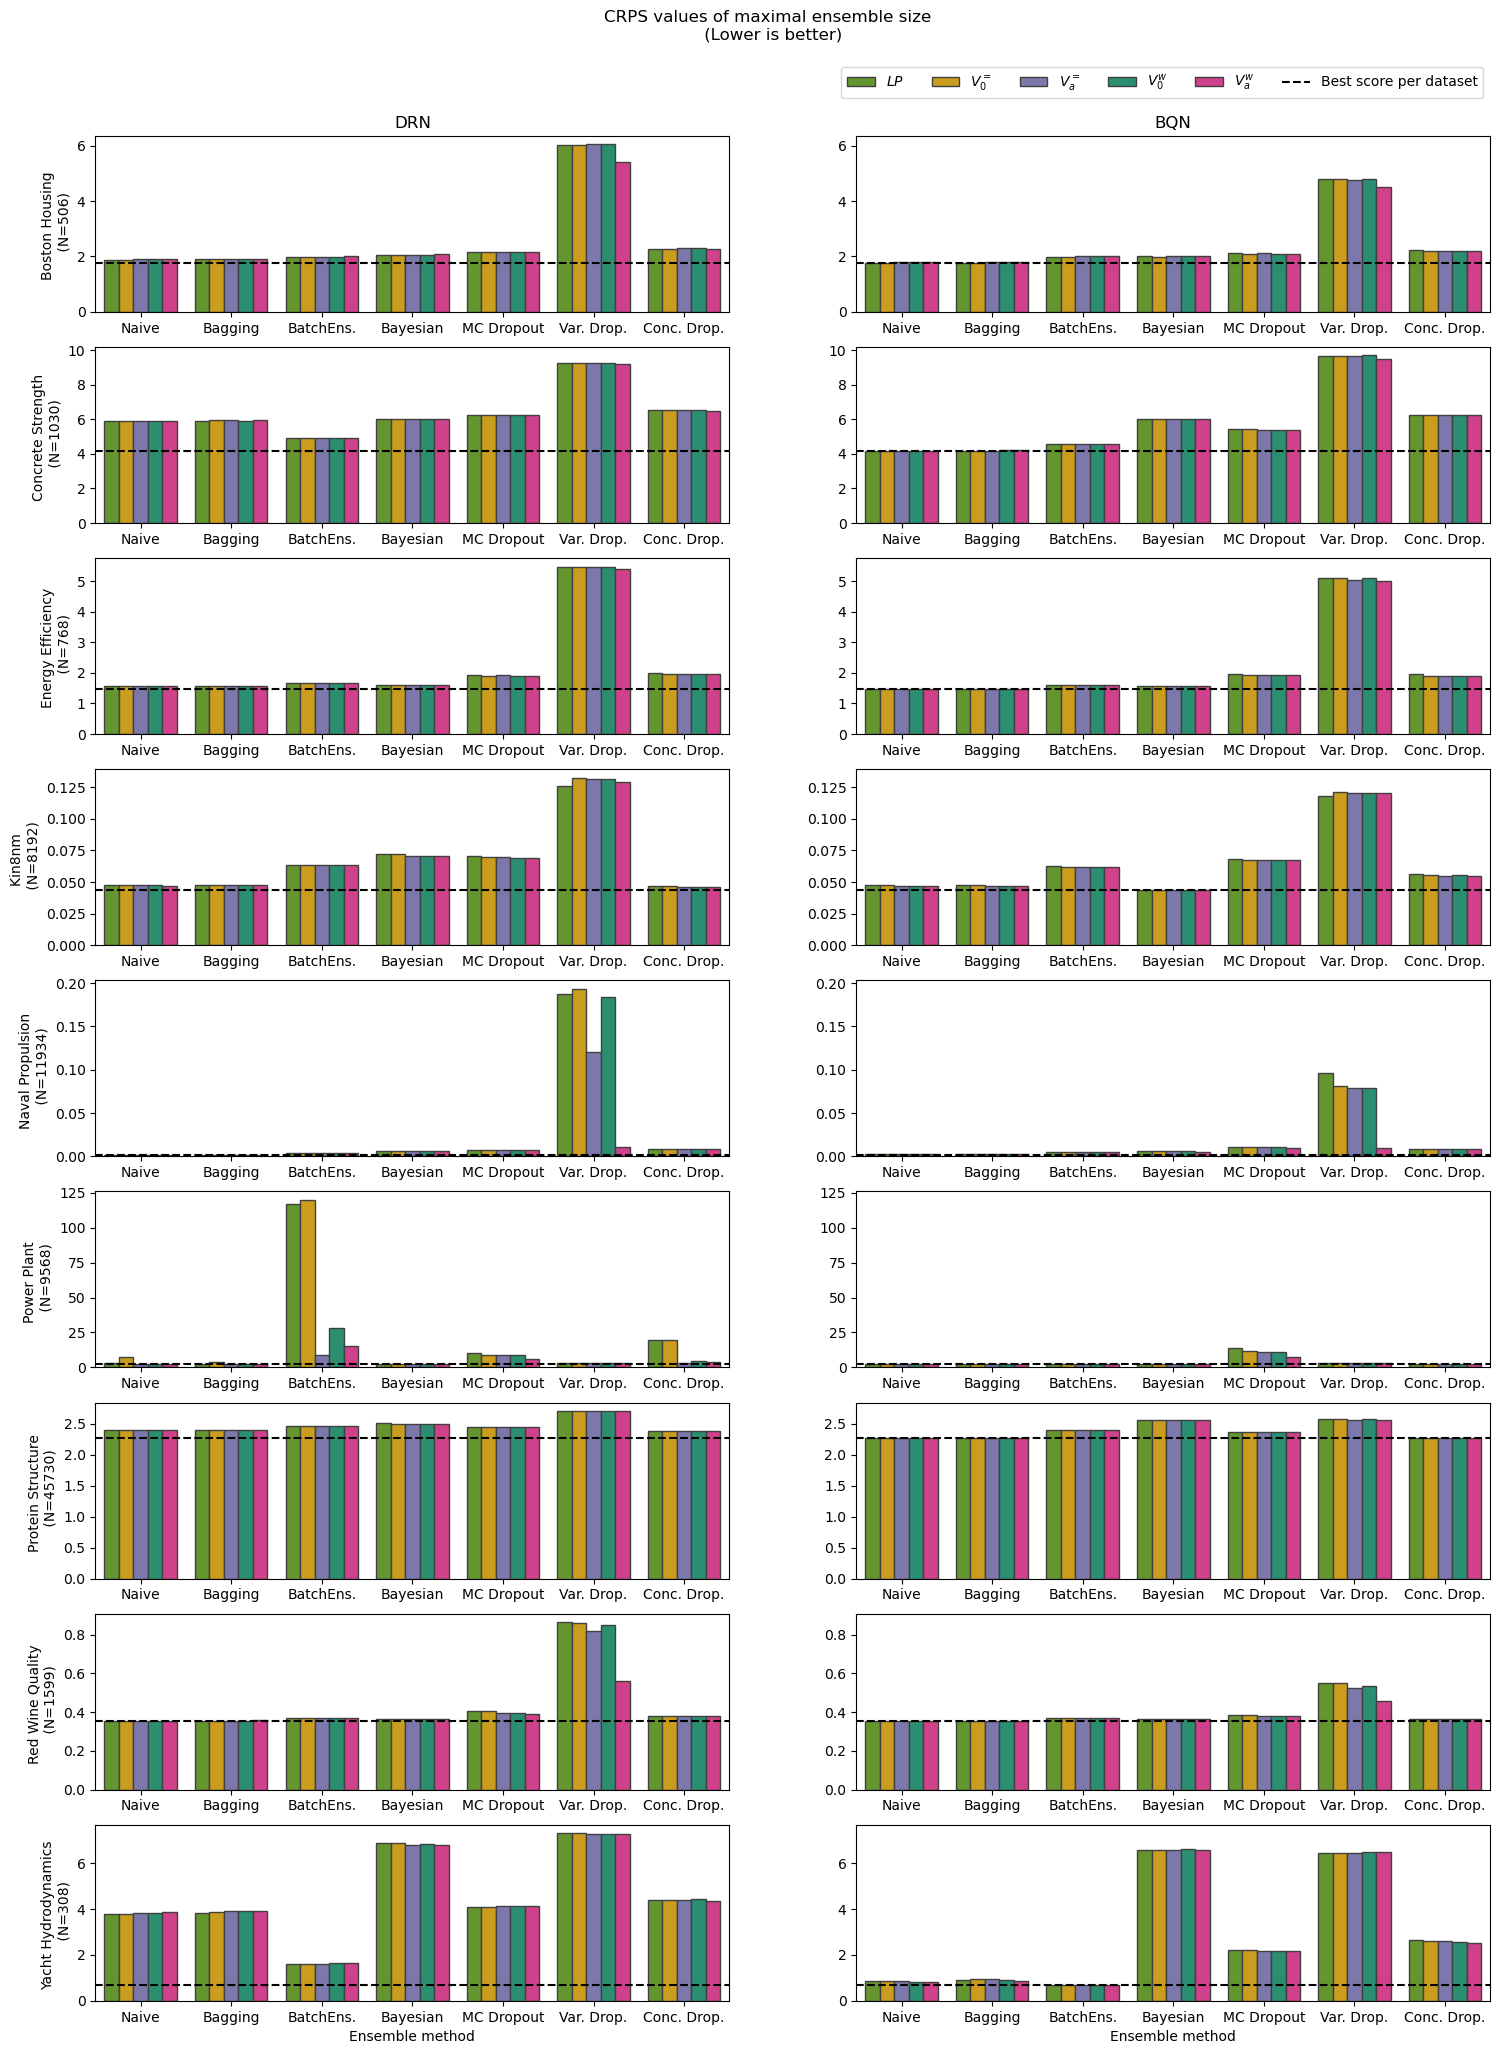

In [11]:
##### Scores - Barplot - x=ensemble_method #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(nn_vec), figsize=(18,18*1.4), squeeze=False)

# Filter out ensemble mean
df_no_ens = df_scores[df_scores["agg"] != "ens"]

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    # df_nn = pd.melt(df_scores[i_nn].reset_index(), id_vars="dataset", var_name="ens_method", value_vars=tables_rel[i_nn].columns, value_name="score")
    df_nn = df_no_ens[df_no_ens["nn"] == nn]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_nn_dataset = df_nn[df_nn["dataset"] == dataset]
        
        # Plot boxplots
        g = sns.barplot(data=df_nn_dataset, x="ens_method", y="score_10", hue="agg", ax=axs[i_dataset][i_nn], palette=agg_col, edgecolor=kit_cols_dict["grey"])
        
        # Get best score for dataset
        best_score = best_scores[best_scores["dataset"] == dataset]["score_10"].iloc[0]
        # Add 0 line
        g.axhline(best_score, linestyle="--", color=kit_cols_dict["black"])
        # Add labels to x and y axis
        axs[i_dataset][i_nn].set_ylabel("")
        axs[i_dataset][0].set_ylabel(dataset_labels[dataset])
        axs[i_dataset][i_nn].set_xticklabels([ens_method_labels.get(column_name) for column_name in ens_method_ls])
        axs[i_dataset][i_nn].set_xlabel("")
        axs[len(dataset_ls)-1][i_nn].set_xlabel("Ensemble method")
        

# Set y axis range
upper_limit = np.Inf
for ax_drn, ax_bqn in axs:
    drn_l, drn_u = ax_drn.get_ylim()
    bqn_l, bqn_u = ax_bqn.get_ylim()
    drn_range = drn_u - drn_l
    bqn_range = bqn_u - bqn_l

    ax_drn.set_ylim(0, min(upper_limit, max(drn_u, bqn_u)))
    ax_bqn.set_ylim(0, min(upper_limit, max(drn_u, bqn_u)))
    

# Merge subplot legends and display figure legend
handles = []
labels = []
for ax in [item for sublist in axs for item in sublist]:
    curr_handles, curr_labels = ax.get_legend_handles_labels()
    for idx, check_label in enumerate(curr_labels):
        if check_label not in labels:
            handles.append(curr_handles[idx])
            labels.append(curr_labels[idx])
    ax.legend([],[], frameon=False)
axhline = matplotlib.lines.Line2D([0], [0], linestyle="dashed", color=kit_cols_dict["black"])  # type: ignore
handles.append(axhline)
labels = [agg_labels.get(agg) for agg in labels]
labels.append("Best score per dataset")

# Set titles and legends
axs[0][0].set_title("DRN")
axs[0][1].set_title("BQN")
fig.subplots_adjust(top=0.85)
fig.legend(handles, labels, bbox_to_anchor=(0.9, 0.88), ncol=len(agg_meths)+1)
fig.suptitle(f"CRPS values of maximal ensemble size \n (Lower is better)", y=0.9)

# Save figure
if export:
    filename=os.path.join(save_dir, "02_scores.pdf")
    fig.savefig(filename, bbox_inches='tight')
    filename=os.path.join(save_dir, "02_scores.png")
    fig.savefig(filename, bbox_inches='tight')

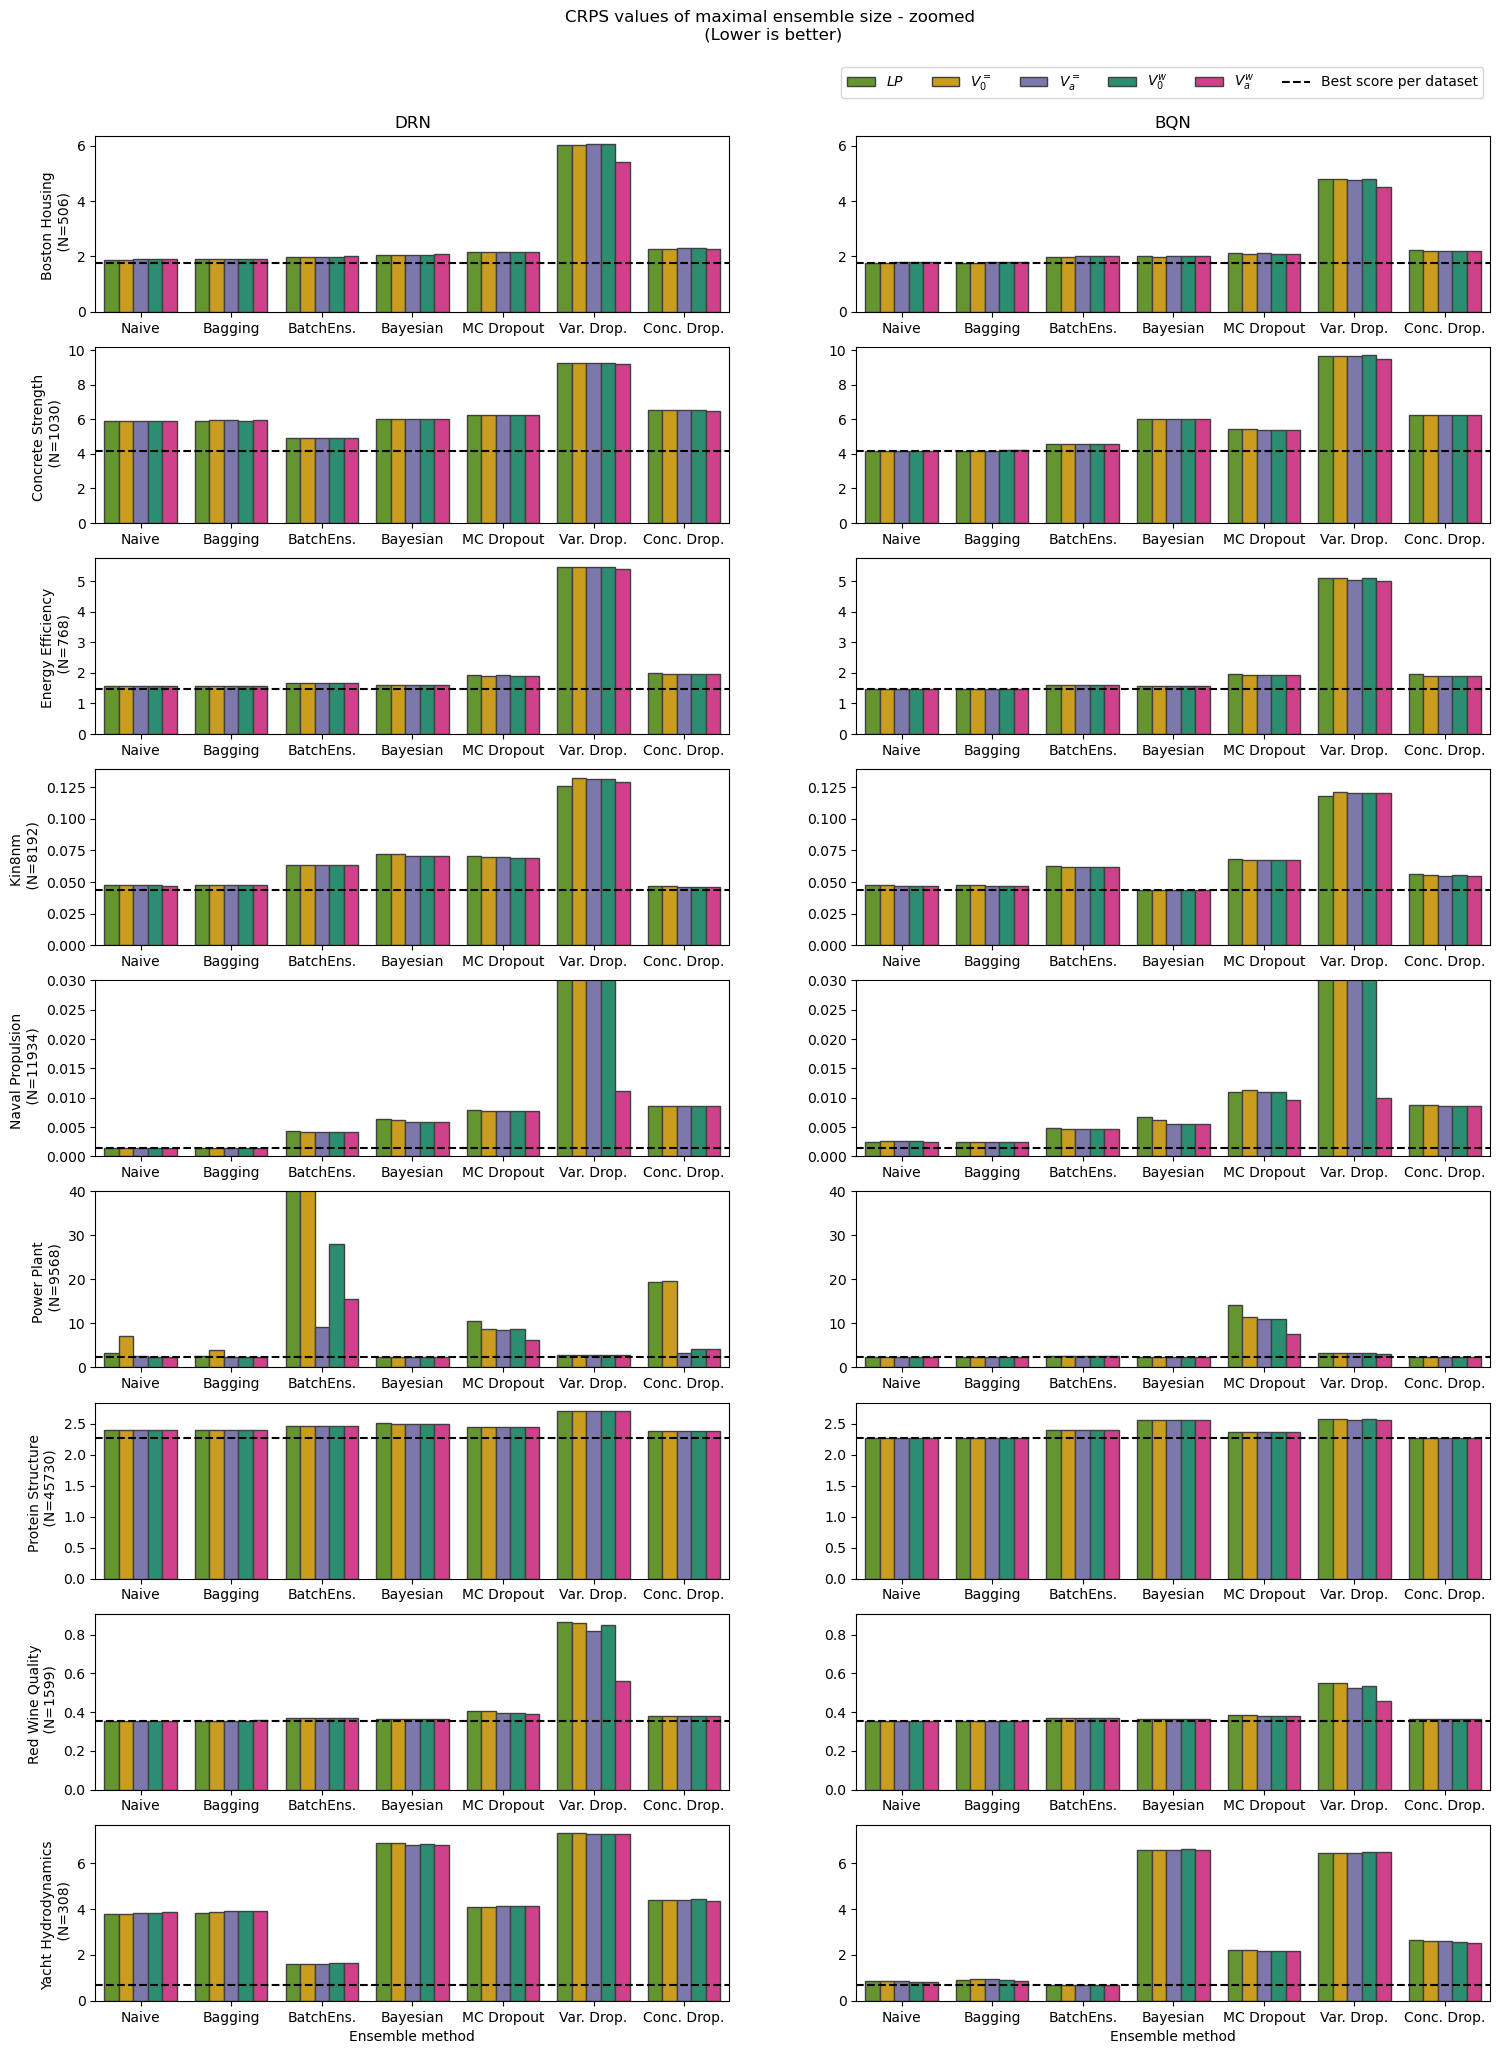

In [12]:
##### Scores - Barplot - x=ensemble_method #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(nn_vec), figsize=(18,18*1.4), squeeze=False)

# Filter out ensemble mean
df_no_ens = df_scores[df_scores["agg"] != "ens"]

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    # df_nn = pd.melt(df_scores[i_nn].reset_index(), id_vars="dataset", var_name="ens_method", value_vars=tables_rel[i_nn].columns, value_name="score")
    df_nn = df_no_ens[df_no_ens["nn"] == nn]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_nn_dataset = df_nn[df_nn["dataset"] == dataset]
        
        # Plot boxplots
        g = sns.barplot(data=df_nn_dataset, x="ens_method", y="score_10", hue="agg", ax=axs[i_dataset][i_nn], palette=agg_col, edgecolor=kit_cols_dict["grey"])
        
        # Get best score for dataset
        best_score = best_scores[best_scores["dataset"] == dataset]["score_10"].iloc[0]
        # Add 0 line
        g.axhline(best_score, linestyle="--", color=kit_cols_dict["black"])
        # Add labels to x and y axis
        axs[i_dataset][i_nn].set_ylabel("")
        axs[i_dataset][0].set_ylabel(dataset_labels[dataset])
        axs[i_dataset][i_nn].set_xticklabels([ens_method_labels.get(column_name) for column_name in ens_method_ls])
        axs[i_dataset][i_nn].set_xlabel("")
        axs[len(dataset_ls)-1][i_nn].set_xlabel("Ensemble method")
        

# Set y axis range
upper_limit = {
    "boston": np.Inf,
    "concrete": np.Inf,
    "energy": np.Inf,
    "kin8nm": np.Inf,
    "naval": 0.03,
    "power": 40,
    "protein": np.Inf,
    "wine": np.Inf,
    "yacht": np.Inf,
}
for idx, (ax_drn, ax_bqn) in enumerate(axs):
    drn_l, drn_u = ax_drn.get_ylim()
    bqn_l, bqn_u = ax_bqn.get_ylim()
    drn_range = drn_u - drn_l
    bqn_range = bqn_u - bqn_l
    
    upper_limit_curr = list(upper_limit.values())[idx]

    ax_drn.set_ylim(0, min(upper_limit_curr, max(drn_u, bqn_u)))
    ax_bqn.set_ylim(0, min(upper_limit_curr, max(drn_u, bqn_u)))
    

# Merge subplot legends and displaz figure legend
handles = []
labels = []
for ax in [item for sublist in axs for item in sublist]:
    curr_handles, curr_labels = ax.get_legend_handles_labels()
    for idx, check_label in enumerate(curr_labels):
        if check_label not in labels:
            handles.append(curr_handles[idx])
            labels.append(curr_labels[idx])
    ax.legend([],[], frameon=False)
axhline = matplotlib.lines.Line2D([0], [0], linestyle="dashed", color=kit_cols_dict["black"])  # type: ignore
handles.append(axhline)
labels = [agg_labels.get(agg) for agg in labels]
labels.append("Best score per dataset")

# Set titles and legends
axs[0][0].set_title("DRN")
axs[0][1].set_title("BQN")
fig.subplots_adjust(top=0.85)
fig.legend(handles, labels, bbox_to_anchor=(0.9, 0.88), ncol=len(agg_meths)+1)
fig.suptitle(f"CRPS values of maximal ensemble size - zoomed\n (Lower is better)", y=0.9)

# Save figure
if export:
    filename=os.path.join(save_dir, "02_scores_zoomed.pdf")
    fig.savefig(filename, bbox_inches='tight')
    filename=os.path.join(save_dir, "02_scores_zoomed.png")
    fig.savefig(filename, bbox_inches='tight')

# Archive

## Barplot - Relative score to best score per dataset

- Columns: NN type (DRN, BQN)
- Rows: Datasets

Aggregated: 

- Best score_10

In [12]:
df_scores["rel_score"] = df_scores.apply(lambda row: float(row["score_10"] / best_scores[best_scores["dataset"] == row["dataset"]]["score_10"]), axis=1)
df_scores

,ens_method,dataset,nn,agg,score_2,score_4,score_6,score_8,score_10,avg_score,rel_score
0,rand_init,boston,drn,lp,1.880196,1.882215,1.874762,1.884769,1.880862,1.880561,1.064823
1,rand_init,boston,drn,vi,1.880447,1.880195,1.877956,1.879042,1.878322,1.879192,1.063385
2,rand_init,boston,drn,vi-a,1.894677,1.895243,1.893030,1.893910,1.893242,1.894020,1.071832
3,rand_init,boston,drn,vi-w,1.896980,1.897274,1.895165,1.896109,1.895413,1.896188,1.073061
4,rand_init,boston,drn,vi-aw,1.901667,1.902644,1.901496,1.902405,1.901480,1.901939,1.076496
...,...,...,...,...,...,...,...,...,...,...,...
751,concrete_dropout,yacht,bqn,vi,2.832418,2.713294,2.641648,2.593826,2.590692,2.674375,3.711639
752,concrete_dropout,yacht,bqn,vi-a,2.843921,2.724507,2.648134,2.601326,2.600102,2.683598,3.725121
753,concrete_dropout,yacht,bqn,vi-w,2.822318,2.674681,2.612777,2.556476,2.554257,2.644102,3.659439
754,concrete_dropout,yacht,bqn,vi-aw,2.811190,2.638940,2.578053,2.516266,2.519275,2.612744,3.609320


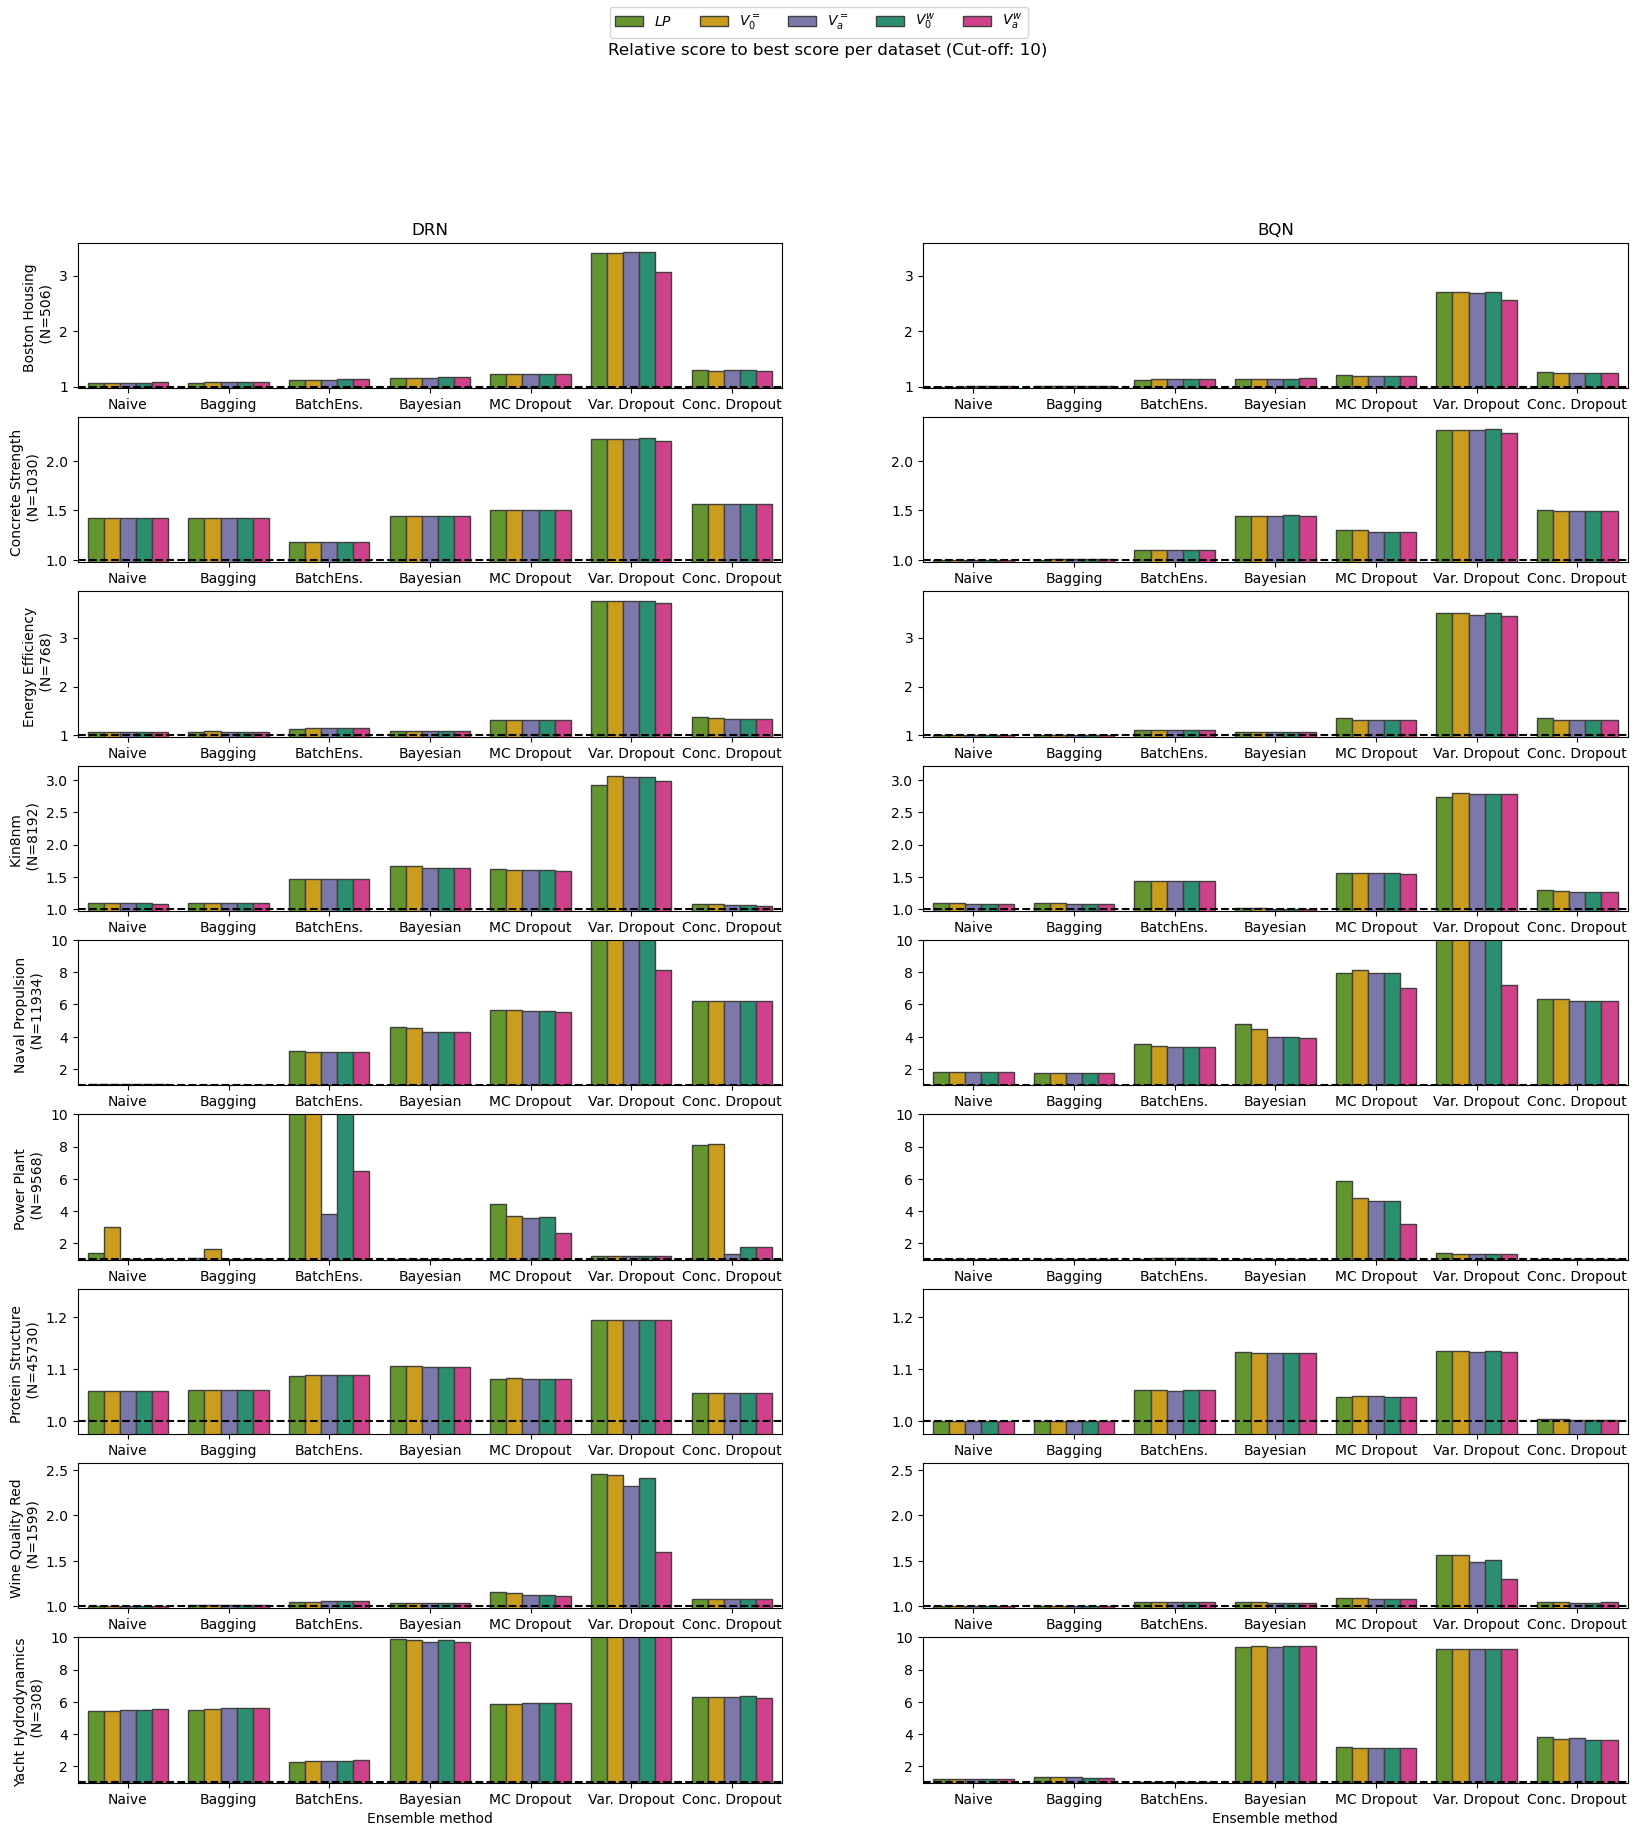

In [13]:
##### Relative score - Barplot - x=ensemble_method #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(nn_vec), figsize=(20,20), squeeze=False)

# Filter out ensemble mean
df_no_ens = df_scores[df_scores["agg"] != "ens"]

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    # df_nn = pd.melt(df_scores[i_nn].reset_index(), id_vars="dataset", var_name="ens_method", value_vars=tables_rel[i_nn].columns, value_name="score")
    df_nn = df_no_ens[df_no_ens["nn"] == nn]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_nn_dataset = df_nn[df_nn["dataset"] == dataset]
        
        # Plot boxplots
        g = sns.barplot(data=df_nn_dataset, x="ens_method", y="rel_score", hue="agg", ax=axs[i_dataset][i_nn], palette=agg_col, edgecolor=kit_cols_dict["grey"])
        
        # Add 0 line
        g.axhline(1, linestyle="--", color=kit_cols_dict["black"])
        # Add labels to x and y axis
        axs[i_dataset][i_nn].set_ylabel("")
        axs[i_dataset][0].set_ylabel(dataset_labels[dataset])
        axs[i_dataset][i_nn].set_xticklabels([ens_method_labels.get(column_name) for column_name in ens_method_ls])
        axs[i_dataset][i_nn].set_xlabel("")
        axs[len(dataset_ls)-1][i_nn].set_xlabel("Ensemble method")
        

# Set y axis range
upper_limit = 10
for ax_drn, ax_bqn in axs:
    drn_l, drn_u = ax_drn.get_ylim()
    bqn_l, bqn_u = ax_bqn.get_ylim()
    drn_range = drn_u - drn_l
    bqn_range = bqn_u - bqn_l

    ax_drn.set_ylim(0.975, min(upper_limit, max(drn_u, bqn_u)))
    ax_bqn.set_ylim(0.975, min(upper_limit, max(drn_u, bqn_u)))
    

# Merge subplot legends and displaz figure legend
handles = []
labels = []
for ax in [item for sublist in axs for item in sublist]:
    curr_handles, curr_labels = ax.get_legend_handles_labels()
    for idx, check_label in enumerate(curr_labels):
        if check_label not in labels:
            handles.append(curr_handles[idx])
            labels.append(curr_labels[idx])
    ax.legend([],[], frameon=False)

# Set titles and legends
axs[0][0].set_title("DRN")
axs[0][1].set_title("BQN")
fig.legend(handles, [agg_labels.get(agg) for agg in labels], loc='upper center', ncol=len(agg_meths))
fig.suptitle(f"Relative score to best score per dataset (Cut-off: {upper_limit})")

# Save figure
if export:
    filename=os.path.join(save_dir, "02_relative_scores.pdf")
    fig.savefig(filename, bbox_inches='tight')
    filename=os.path.join(save_dir, "02_relative_scores.png")
    fig.savefig(filename, bbox_inches='tight')

In [57]:
df_scores

,ens_method,dataset,nn,agg,score_2,score_4,score_6,score_8,score_10,avg_score,rel_score
0,rand_init,boston,drn,lp,1.880196,1.882215,1.874762,1.884769,1.880862,1.880561,1.064823
1,rand_init,boston,drn,vi,1.880447,1.880195,1.877956,1.879042,1.878322,1.879192,1.063385
2,rand_init,boston,drn,vi-a,1.894677,1.895243,1.893030,1.893910,1.893242,1.894020,1.071832
3,rand_init,boston,drn,vi-w,1.896980,1.897274,1.895165,1.896109,1.895413,1.896188,1.073061
4,rand_init,boston,drn,vi-aw,1.901667,1.902644,1.901496,1.902405,1.901480,1.901939,1.076496
...,...,...,...,...,...,...,...,...,...,...,...
751,concrete_dropout,yacht,bqn,vi,2.832418,2.713294,2.641648,2.593826,2.590692,2.674375,3.711639
752,concrete_dropout,yacht,bqn,vi-a,2.843921,2.724507,2.648134,2.601326,2.600102,2.683598,3.725121
753,concrete_dropout,yacht,bqn,vi-w,2.822318,2.674681,2.612777,2.556476,2.554257,2.644102,3.659439
754,concrete_dropout,yacht,bqn,vi-aw,2.811190,2.638940,2.578053,2.516266,2.519275,2.612744,3.609320


In [59]:
df_temp = df_scores.sort_values(["dataset", "nn", "rel_score"]).groupby(["nn", "dataset"])

best_methods_bqn = {}
best_methods_drn = {}

for idx, row in df_temp:
    

,ens_method,dataset,nn,agg,score_2,score_4,score_6,score_8,score_10,avg_score,rel_score
6,rand_init,boston,bqn,lp,1.785155,1.773156,1.768902,1.770038,1.766361,1.772722,1.000000
7,rand_init,boston,bqn,vi,1.782259,1.772911,1.770087,1.767983,1.767685,1.772185,1.000750
114,bagging,boston,bqn,lp,1.799942,1.789081,1.783308,1.776983,1.770553,1.783973,1.002373
115,bagging,boston,bqn,vi,1.801369,1.791756,1.785121,1.779542,1.775644,1.786686,1.005255
8,rand_init,boston,bqn,vi-a,1.797193,1.786780,1.784672,1.782745,1.782529,1.786784,1.009154
...,...,...,...,...,...,...,...,...,...,...,...
312,batchensemble,yacht,drn,lp,1.631673,1.644962,1.596771,1.582200,1.582375,1.607596,2.267040
313,batchensemble,yacht,drn,vi,1.646904,1.667773,1.618964,1.599293,1.601764,1.626940,2.294819
314,batchensemble,yacht,drn,vi-a,1.648998,1.670655,1.622428,1.601584,1.604660,1.629665,2.298968
315,batchensemble,yacht,drn,vi-w,1.674229,1.695000,1.648590,1.635828,1.638531,1.658436,2.347495


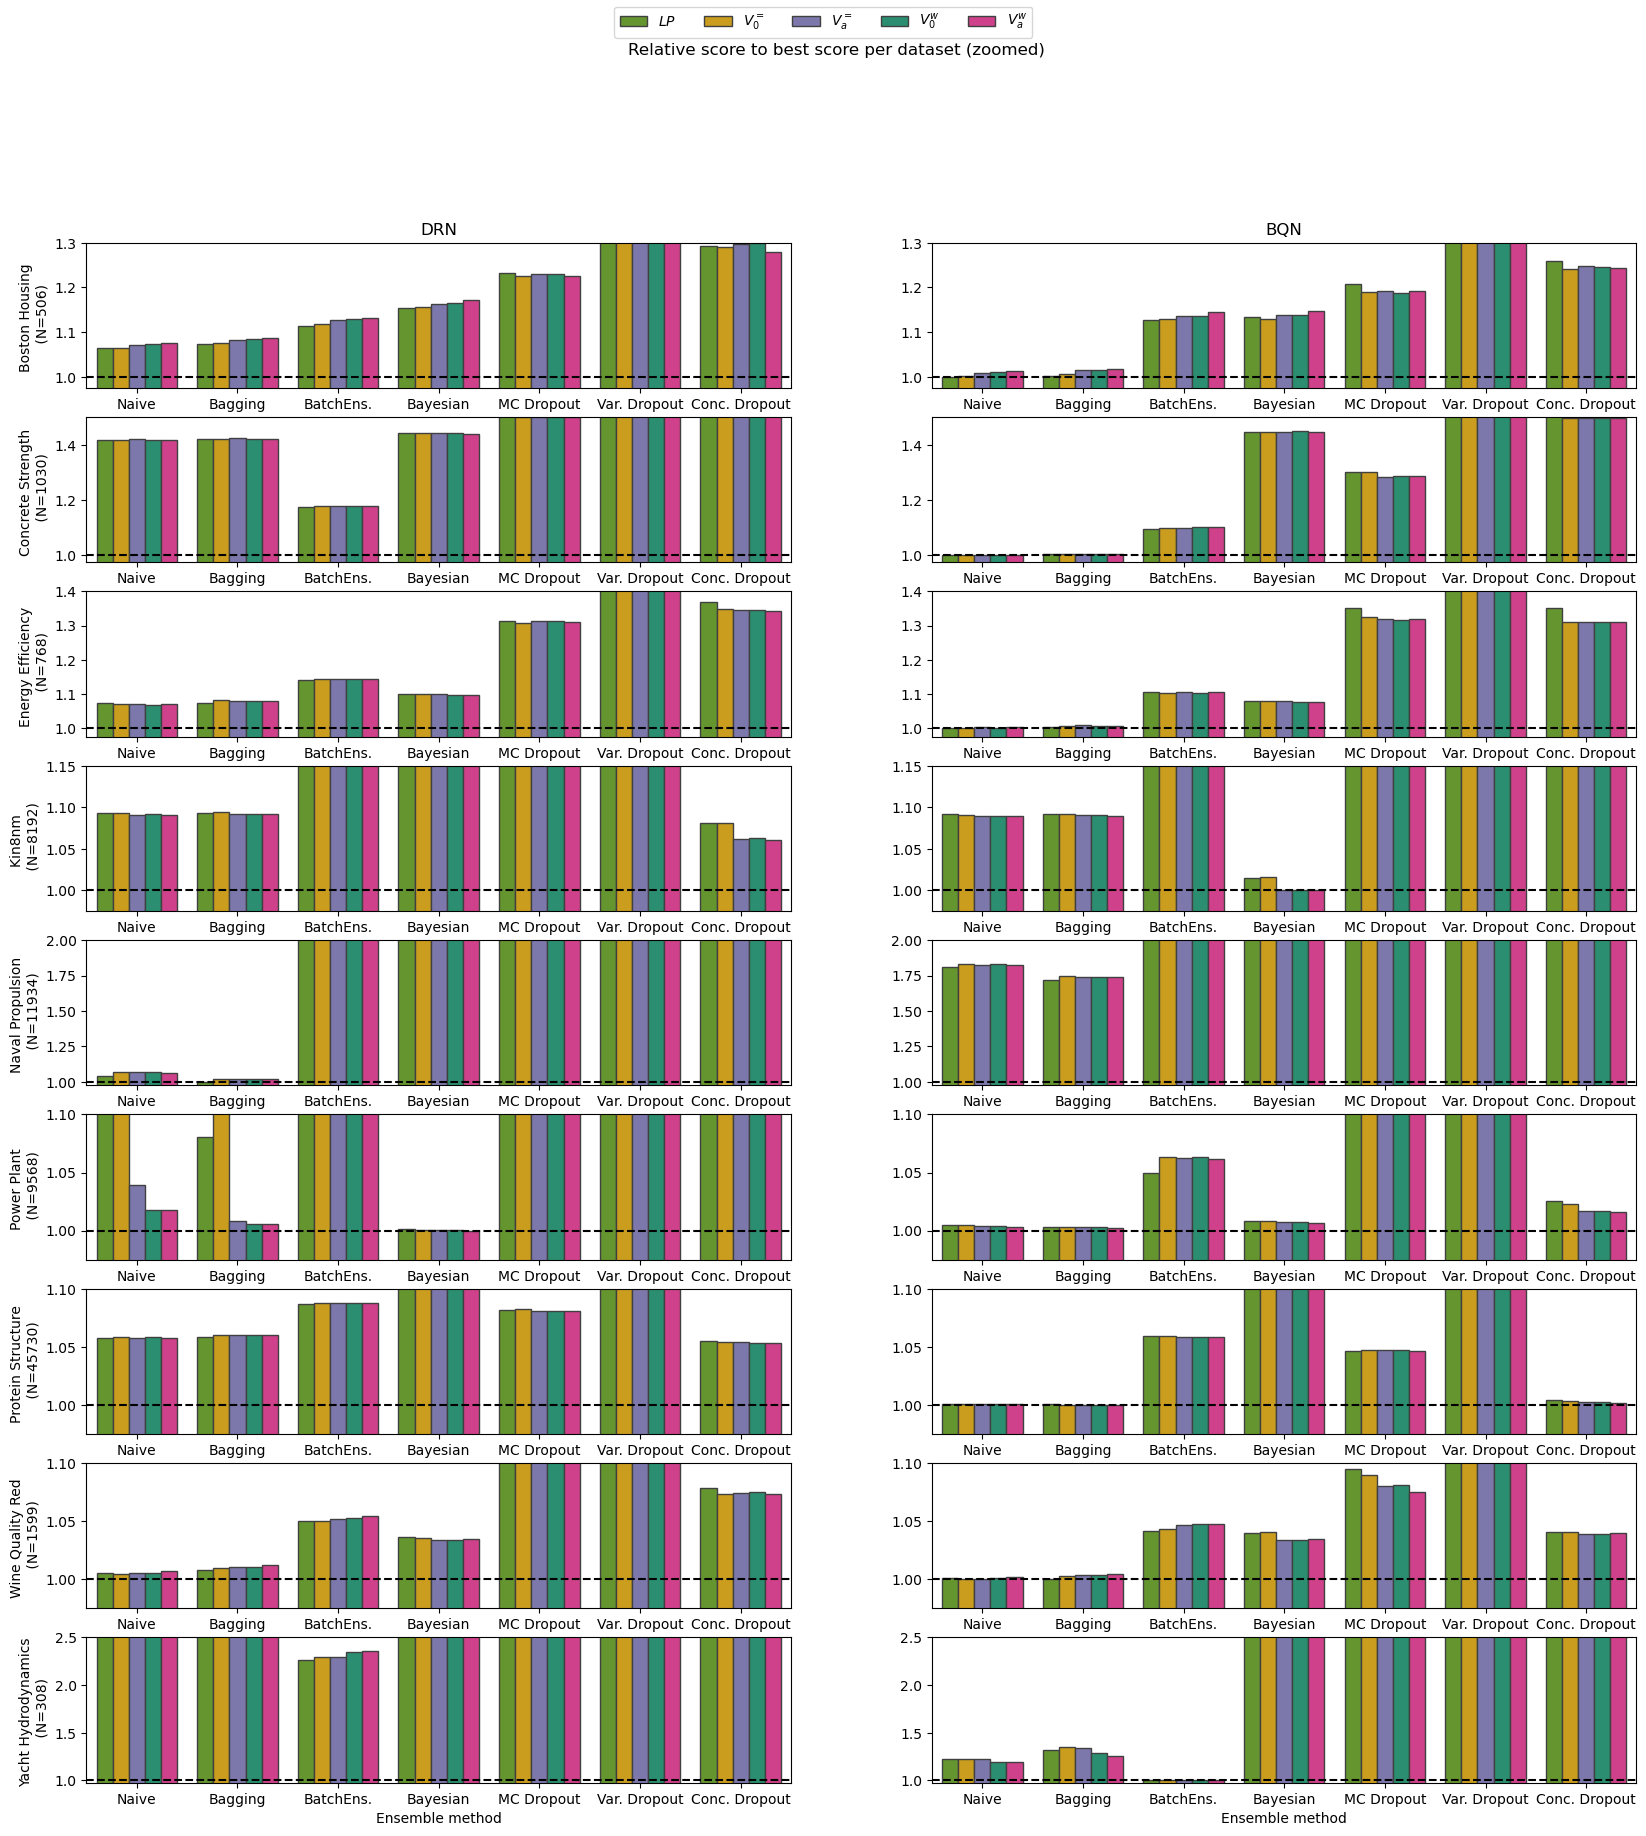

In [14]:
##### Relative score - Barplot - x=ensemble_method #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(nn_vec), figsize=(20,20), squeeze=False)

# Filter out ensemble mean
df_no_ens = df_scores[df_scores["agg"] != "ens"]

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    # df_nn = pd.melt(df_scores[i_nn].reset_index(), id_vars="dataset", var_name="ens_method", value_vars=tables_rel[i_nn].columns, value_name="score")
    df_nn = df_no_ens[df_no_ens["nn"] == nn]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_nn_dataset = df_nn[df_nn["dataset"] == dataset]
        
        # Plot boxplots
        g = sns.barplot(data=df_nn_dataset, x="ens_method", y="rel_score", hue="agg", ax=axs[i_dataset][i_nn], palette=agg_col, edgecolor=kit_cols_dict["grey"])
        
        # Add 0 line
        g.axhline(1, linestyle="--", color=kit_cols_dict["black"])
        # Add labels to x and y axis
        axs[i_dataset][i_nn].set_ylabel("")
        axs[i_dataset][0].set_ylabel(dataset_labels[dataset])
        axs[i_dataset][i_nn].set_xticklabels([ens_method_labels.get(column_name) for column_name in ens_method_ls])
        axs[i_dataset][i_nn].set_xlabel("")
        axs[len(dataset_ls)-1][i_nn].set_xlabel("Ensemble method")

# Set y axis range
upper_limit = {
    "boston": 1.3,
    "concrete": 1.5,
    "energy": 1.4,
    "kin8nm": 1.15,
    "naval": 2.0,
    "power": 1.1,
    "protein": 1.1,
    "wine": 1.1,
    "yacht": 2.5,
}
for idx, (ax_drn, ax_bqn) in enumerate(axs):
    drn_l, drn_u = ax_drn.get_ylim()
    bqn_l, bqn_u = ax_bqn.get_ylim()
    drn_range = drn_u - drn_l
    bqn_range = bqn_u - bqn_l
    
    upper_limit_curr = list(upper_limit.values())[idx]

    ax_drn.set_ylim(0.975, min(upper_limit_curr, max(drn_u, bqn_u)))
    ax_bqn.set_ylim(0.975, min(upper_limit_curr, max(drn_u, bqn_u)))
    

# Merge subplot legends and displaz figure legend
handles = []
labels = []
for ax in [item for sublist in axs for item in sublist]:
    curr_handles, curr_labels = ax.get_legend_handles_labels()
    for idx, check_label in enumerate(curr_labels):
        if check_label not in labels:
            handles.append(curr_handles[idx])
            labels.append(curr_labels[idx])
    ax.legend([],[], frameon=False)

# Set titles and legends
axs[0][0].set_title("DRN")
axs[0][1].set_title("BQN")
fig.legend(handles, [agg_labels.get(agg) for agg in labels], loc='upper center', ncol=len(agg_meths))
fig.suptitle(f"Relative score to best score per dataset (zoomed)")

# Save figure
if export:
    filename=os.path.join(save_dir, "02_relative_scores_zoom.pdf")
    fig.savefig(filename, bbox_inches='tight')
    filename=os.path.join(save_dir, "02_relative_scores_zoom.png")
    fig.savefig(filename, bbox_inches='tight')

## Best scores table and bar chart

- Columns: NN type (DRN, BQN)
- Rows: Datasets

Aggregated: 

- Best aggregation method and ensemble size per (dataset x ens_method)

In [6]:
results = get_best_scores_table(data_path, nn_vec, ens_method_ls, agg_meths, dataset_ls, n_ens_vec)
drn_table: pd.DataFrame = results["drn_results"]  # type: ignore
bqn_table: pd.DataFrame = results["bqn_results"]  # type: ignore
drn_table_rel = drn_table.apply(lambda row: row[ens_method_ls] / min(row[ens_method_ls]) ,axis=1)
bqn_table_rel = bqn_table.apply(lambda row: row[ens_method_ls] / min(row[ens_method_ls]) ,axis=1)

In [22]:
drn_droppod = drn_table_rel.drop("variational_dropout", axis=1)
bqn_dropped = bqn_table_rel.drop("variational_dropout", axis=1)

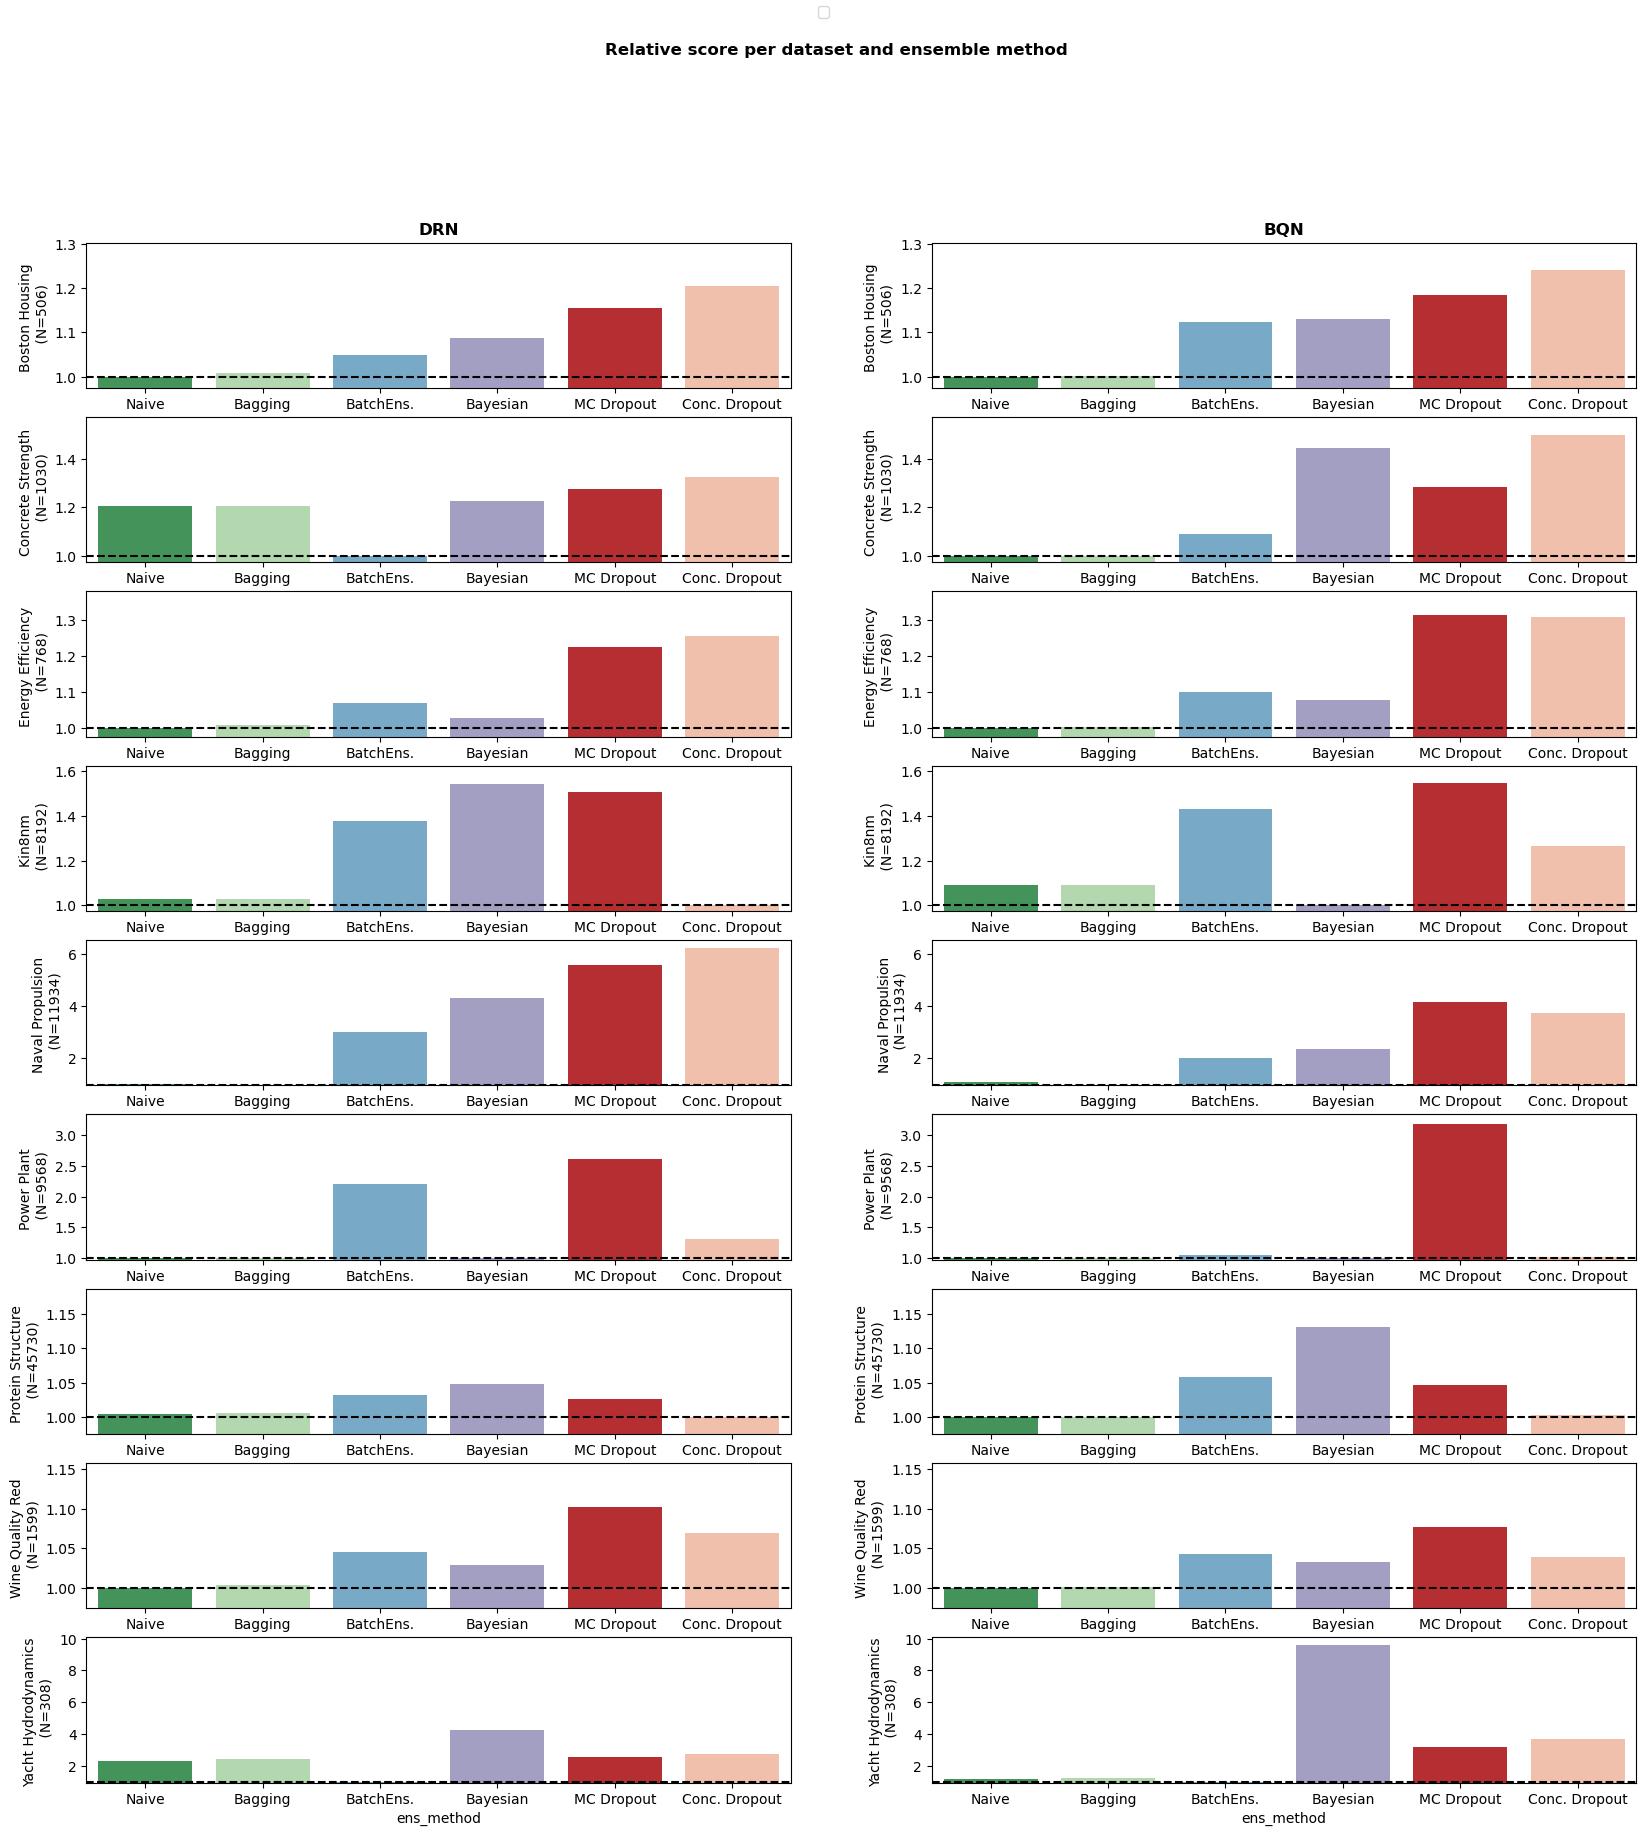

In [34]:
tables_rel = [drn_table_rel, bqn_table_rel]
tables_rel = [drn_droppod, bqn_dropped]

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(nn_vec), figsize=(20,20), squeeze=False)

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    df_nn = pd.melt(tables_rel[i_nn].reset_index(), id_vars="dataset", var_name="ens_method", value_vars=tables_rel[i_nn].columns, value_name="score")
    for i_dataset, dataset in enumerate(dataset_ls):
        df_nn_dataset = df_nn[df_nn["dataset"] == dataset]
        
        # Plot boxplots
        g = sns.barplot(data=df_nn_dataset, x="ens_method", y="score", ax=axs[i_dataset][i_nn], palette=ens_col)
        
        # Add 0 line
        g.axhline(1, linestyle="--", color="black")
        # Add labels to y axis
        axs[i_dataset][i_nn].set_ylabel(dataset_labels[dataset])
        axs[i_dataset][i_nn].set_xticklabels([ens_method_labels.get(column_name) for column_name in tables_rel[i_nn].columns])

# Set y axis range
for ax_drn, ax_bqn in axs:
    drn_l, drn_u = ax_drn.get_ylim()
    bqn_l, bqn_u = ax_bqn.get_ylim()
    drn_range = drn_u - drn_l
    bqn_range = bqn_u - bqn_l
    
    ax_drn.set_ylim(0.975, max(drn_u, bqn_u))
    ax_bqn.set_ylim(0.975, max(drn_u, bqn_u))
    

# Merge subplot legends and displaz figure legend
handles = []
labels = []
for ax in [item for sublist in axs for item in sublist]:
    curr_handles, curr_labels = ax.get_legend_handles_labels()
    for idx, check_label in enumerate(curr_labels):
        if check_label not in labels:
            handles.append(curr_handles[idx])
            labels.append(curr_labels[idx])
    ax.legend([],[], frameon=False)

# Set titles and legends
axs[0][0].set_title("DRN", fontweight="bold")
axs[0][1].set_title("BQN", fontweight="bold")
fig.legend(handles, labels, loc='upper center', ncol=len(labels))
fig.suptitle(f"Relative score per dataset and ensemble method", fontweight="bold")

# Save figure
# if export:
#     filename=os.path.join(save_dir, "02_relative_scores_no_var.pdf")
#     fig.savefig(filename, bbox_inches='tight')
#     filename=os.path.join(save_dir, "02_relative_scores_no_var.png")
#     fig.savefig(filename, bbox_inches='tight')

Text(0.5, 0.98, 'Relative score per dataset and ensemble method')

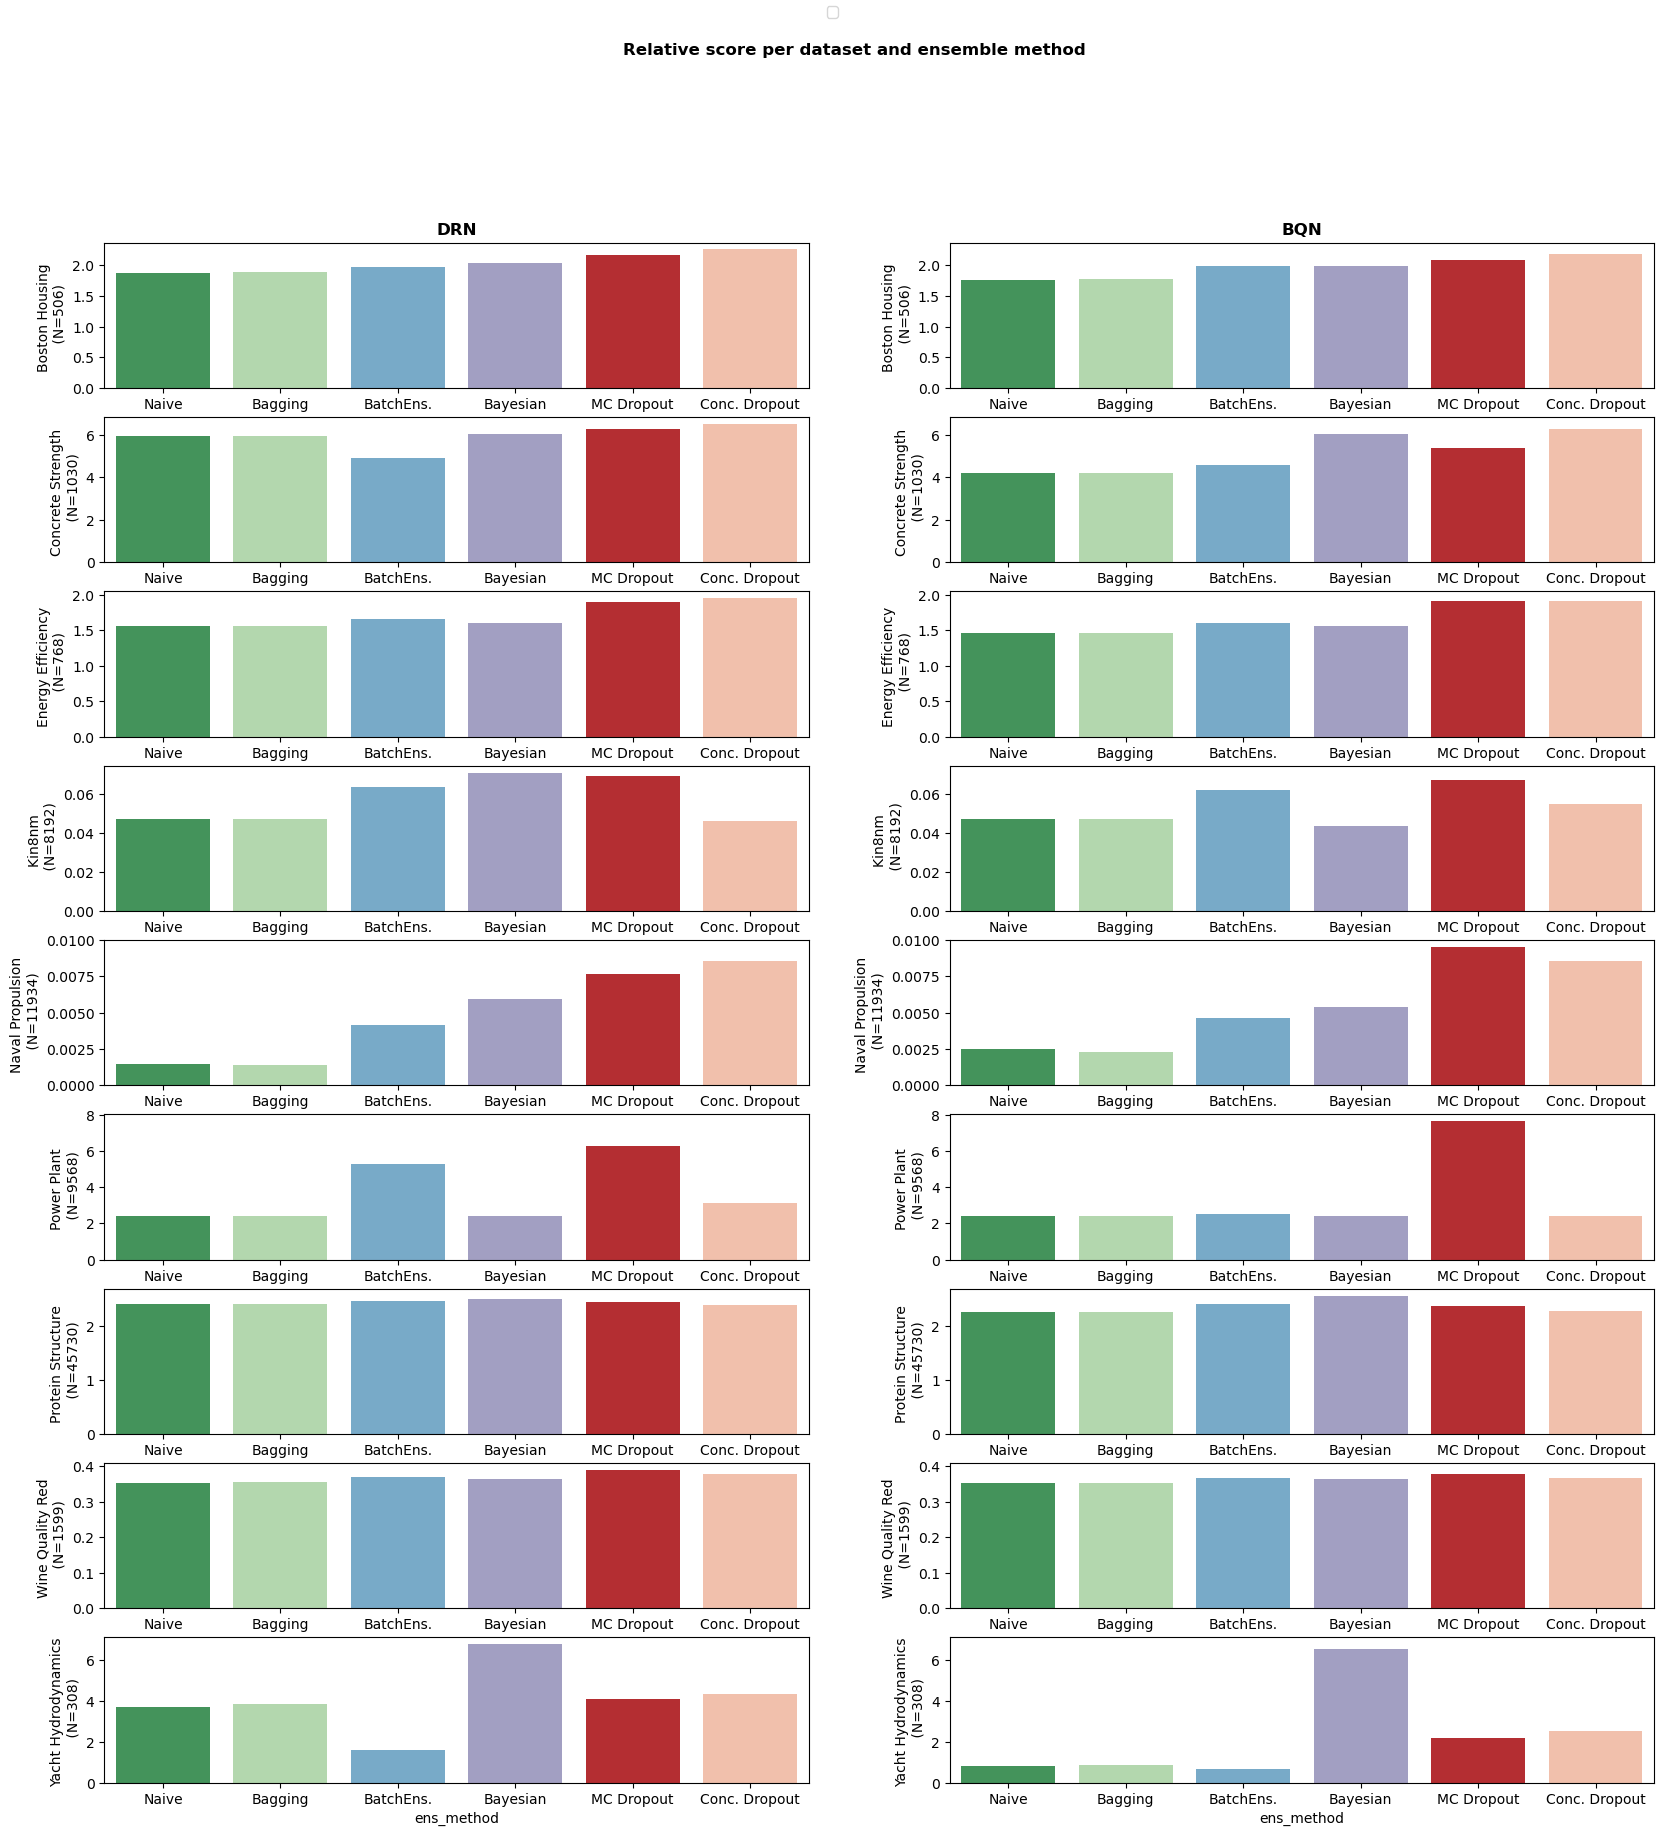

In [29]:
tables = [drn_table, bqn_table]

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(nn_vec), figsize=(20,20), squeeze=False)

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    df_nn = pd.melt(tables[i_nn].reset_index(), id_vars="dataset", var_name="ens_method", value_vars=tables_rel[i_nn].columns, value_name="score")

    for i_dataset, dataset in enumerate(dataset_ls):
        df_nn_dataset = df_nn[df_nn["dataset"] == dataset]
        
        # Plot boxplots
        g = sns.barplot(data=df_nn_dataset, x="ens_method", y="score", ax=axs[i_dataset][i_nn], palette=ens_col)
        
        # Add 0 line

        # g.axhline(0, linestyle="--", color="black")
        # Add labels to y axis
        axs[i_dataset][i_nn].set_ylabel(dataset_labels[dataset])
        axs[i_dataset][i_nn].set_xticklabels([ens_method_labels.get(column_name) for column_name in tables_rel[i_nn].columns])

# Set y axis range
for ax_drn, ax_bqn in axs:
    drn_l, drn_u = ax_drn.get_ylim()
    bqn_l, bqn_u = ax_bqn.get_ylim()
    drn_range = drn_u - drn_l
    bqn_range = bqn_u - bqn_l
    
    ax_drn.set_ylim(min(drn_l, bqn_l), max(drn_u, bqn_u))
    ax_bqn.set_ylim(min(drn_l, bqn_l), max(drn_u, bqn_u))

# Merge subplot legends and displaz figure legend
handles = []
labels = []
for ax in [item for sublist in axs for item in sublist]:
    curr_handles, curr_labels = ax.get_legend_handles_labels()
    for idx, check_label in enumerate(curr_labels):
        if check_label not in labels:
            handles.append(curr_handles[idx])
            labels.append(curr_labels[idx])
    ax.legend([],[], frameon=False)

# Set titles and legends
axs[0][0].set_title("DRN", fontweight="bold")
axs[0][1].set_title("BQN", fontweight="bold")
fig.legend(handles, labels, loc='upper center', ncol=len(labels))
fig.suptitle(f"Relative score per dataset and ensemble method", fontweight="bold")

## Plot skill for increasing ensemble size for best aggregation method per ensemble method (Top k)

- Columns: NN type (DRN, BQN)
- Rows: Datasets

Filtered for:

- Best aggregation method
- Best k ensemble methods

In [37]:
# Define filters
top_k = 5
top_k_score = "score_10"

In [41]:
df_top_k

,ens_method,dataset,nn,agg,score_2,score_4,score_6,score_8,score_10,avg_score
5,rand_init,boston,bqn,lp,1.785155,1.773156,1.768902,1.770038,1.766361,1.772722
95,bagging,boston,bqn,lp,1.799942,1.789081,1.783308,1.776983,1.770553,1.783973
545,batchensemble,boston,bqn,lp,2.008892,1.985614,1.986565,1.997611,1.992191,1.994175
456,bayesian,boston,bqn,vi,1.996527,1.996320,1.996406,1.996229,1.996207,1.996338
188,mc_dropout,boston,bqn,vi-w,2.196028,2.110926,2.107827,2.093203,2.095747,2.120746
...,...,...,...,...,...,...,...,...,...,...
620,batchensemble,yacht,drn,lp,1.631673,1.644962,1.596771,1.582200,1.582375,1.607596
80,rand_init,yacht,drn,lp,3.724548,3.729834,3.758939,3.751134,3.774765,3.747844
170,bagging,yacht,drn,lp,3.989215,3.856633,3.899947,3.852076,3.837307,3.887035
260,mc_dropout,yacht,drn,lp,4.118001,4.115329,4.102407,4.103837,4.096527,4.107220


Text(0.5, 0.98, 'Aggregation method LP, show only Top 5')

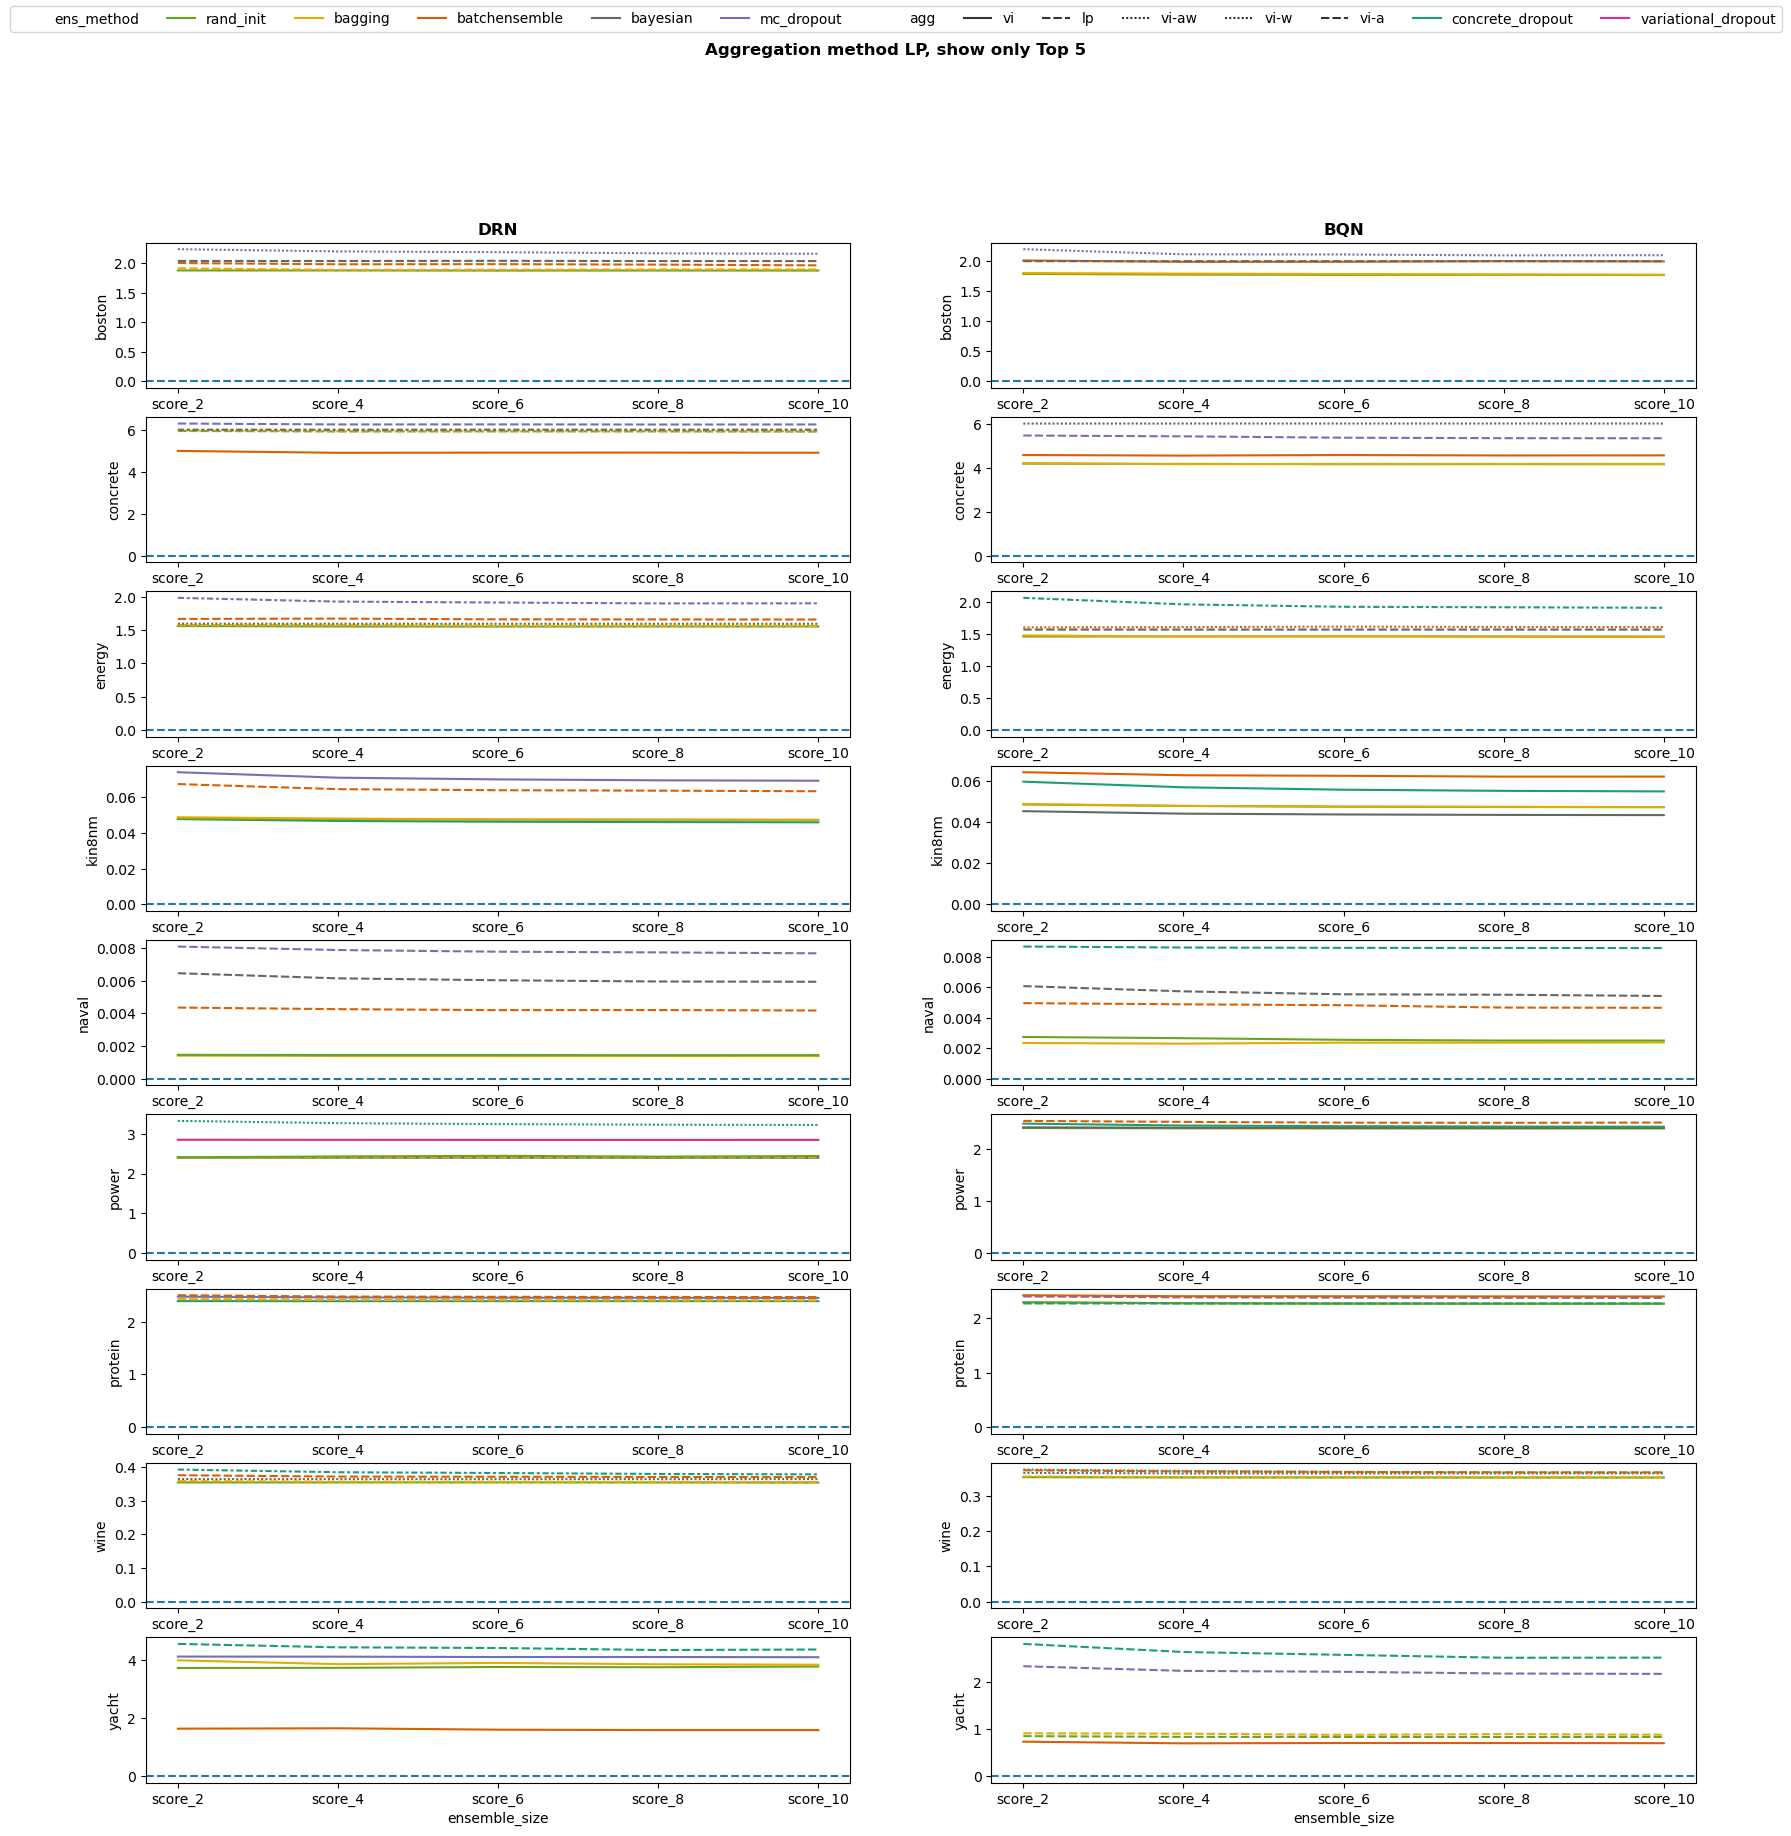

In [42]:
# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(nn_vec), figsize=(20,20), squeeze=False)

# Sort and select best k results
df_best_agg = df_scores.sort_values(["dataset", "nn", "ens_method", top_k_score], ascending=True).groupby(["dataset", "nn", "ens_method"]).head(1)
df_top_k = df_best_agg.sort_values(["dataset", "nn", top_k_score], ascending=True).groupby(["dataset", "nn"]).head(top_k)

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    df_nn = df_top_k[df_top_k["nn"] == nn]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_nn_dataset = df_nn[(df_nn["dataset"] == dataset)]
        # Melt dataframe for sns plots
        df_melt = pd.melt(df_nn_dataset, id_vars=["ens_method", "dataset", "nn", "agg"], var_name="ensemble_size", value_name="score")
        # Only use skills not differences
        df_final = df_melt[df_melt["ensemble_size"].isin([f"score_{n_ens}" for n_ens in n_ens_vec])]
        
        # Plot boxplots
        g = sns.lineplot(data=df_final, x="ensemble_size", y="score", hue="ens_method", style="agg", ax=axs[i_dataset][i_nn], palette=ens_col)
        
        # Add 0 line
        g.axhline(0, linestyle="--")
        # Add labels to y axis
        axs[i_dataset][i_nn].set_ylabel(dataset)

# Merge subplot legends and displaz figure legend
handles = []
labels = []
for ax in [item for sublist in axs for item in sublist]:
    curr_handles, curr_labels = ax.get_legend_handles_labels()
    for idx, check_label in enumerate(curr_labels):
        if check_label not in labels:
            handles.append(curr_handles[idx])
            labels.append(curr_labels[idx])
    ax.legend([],[], frameon=False)

# Set titles and legends
axs[0][0].set_title("DRN", fontweight="bold")
axs[0][1].set_title("BQN", fontweight="bold")
fig.legend(handles, labels, loc='upper center', ncol=len(labels))
fig.suptitle(f"Aggregation method {agg_method_to_plot.upper()}, show only Top {top_k}", fontweight="bold")

## Plot score for ensemble methods

- Columns: NN type (DRN, BQN)
- Rows: Datasets

Filtered for:

- Best aggregation method

In [16]:
best_score = "score_10"

In [29]:
df_best_agg.query("ens_method == 'variational_dropout' & dataset == 'yacht'")

,ens_method,dataset,nn,agg,score_2,score_4,score_6,score_8,score_10,avg_score
350,variational_dropout,yacht,drn,lp,7.315871,7.319132,7.318768,7.317788,7.312777,7.316867
359,variational_dropout,yacht,bqn,vi-aw,6.478071,6.478817,6.471532,6.472136,6.470922,6.474296


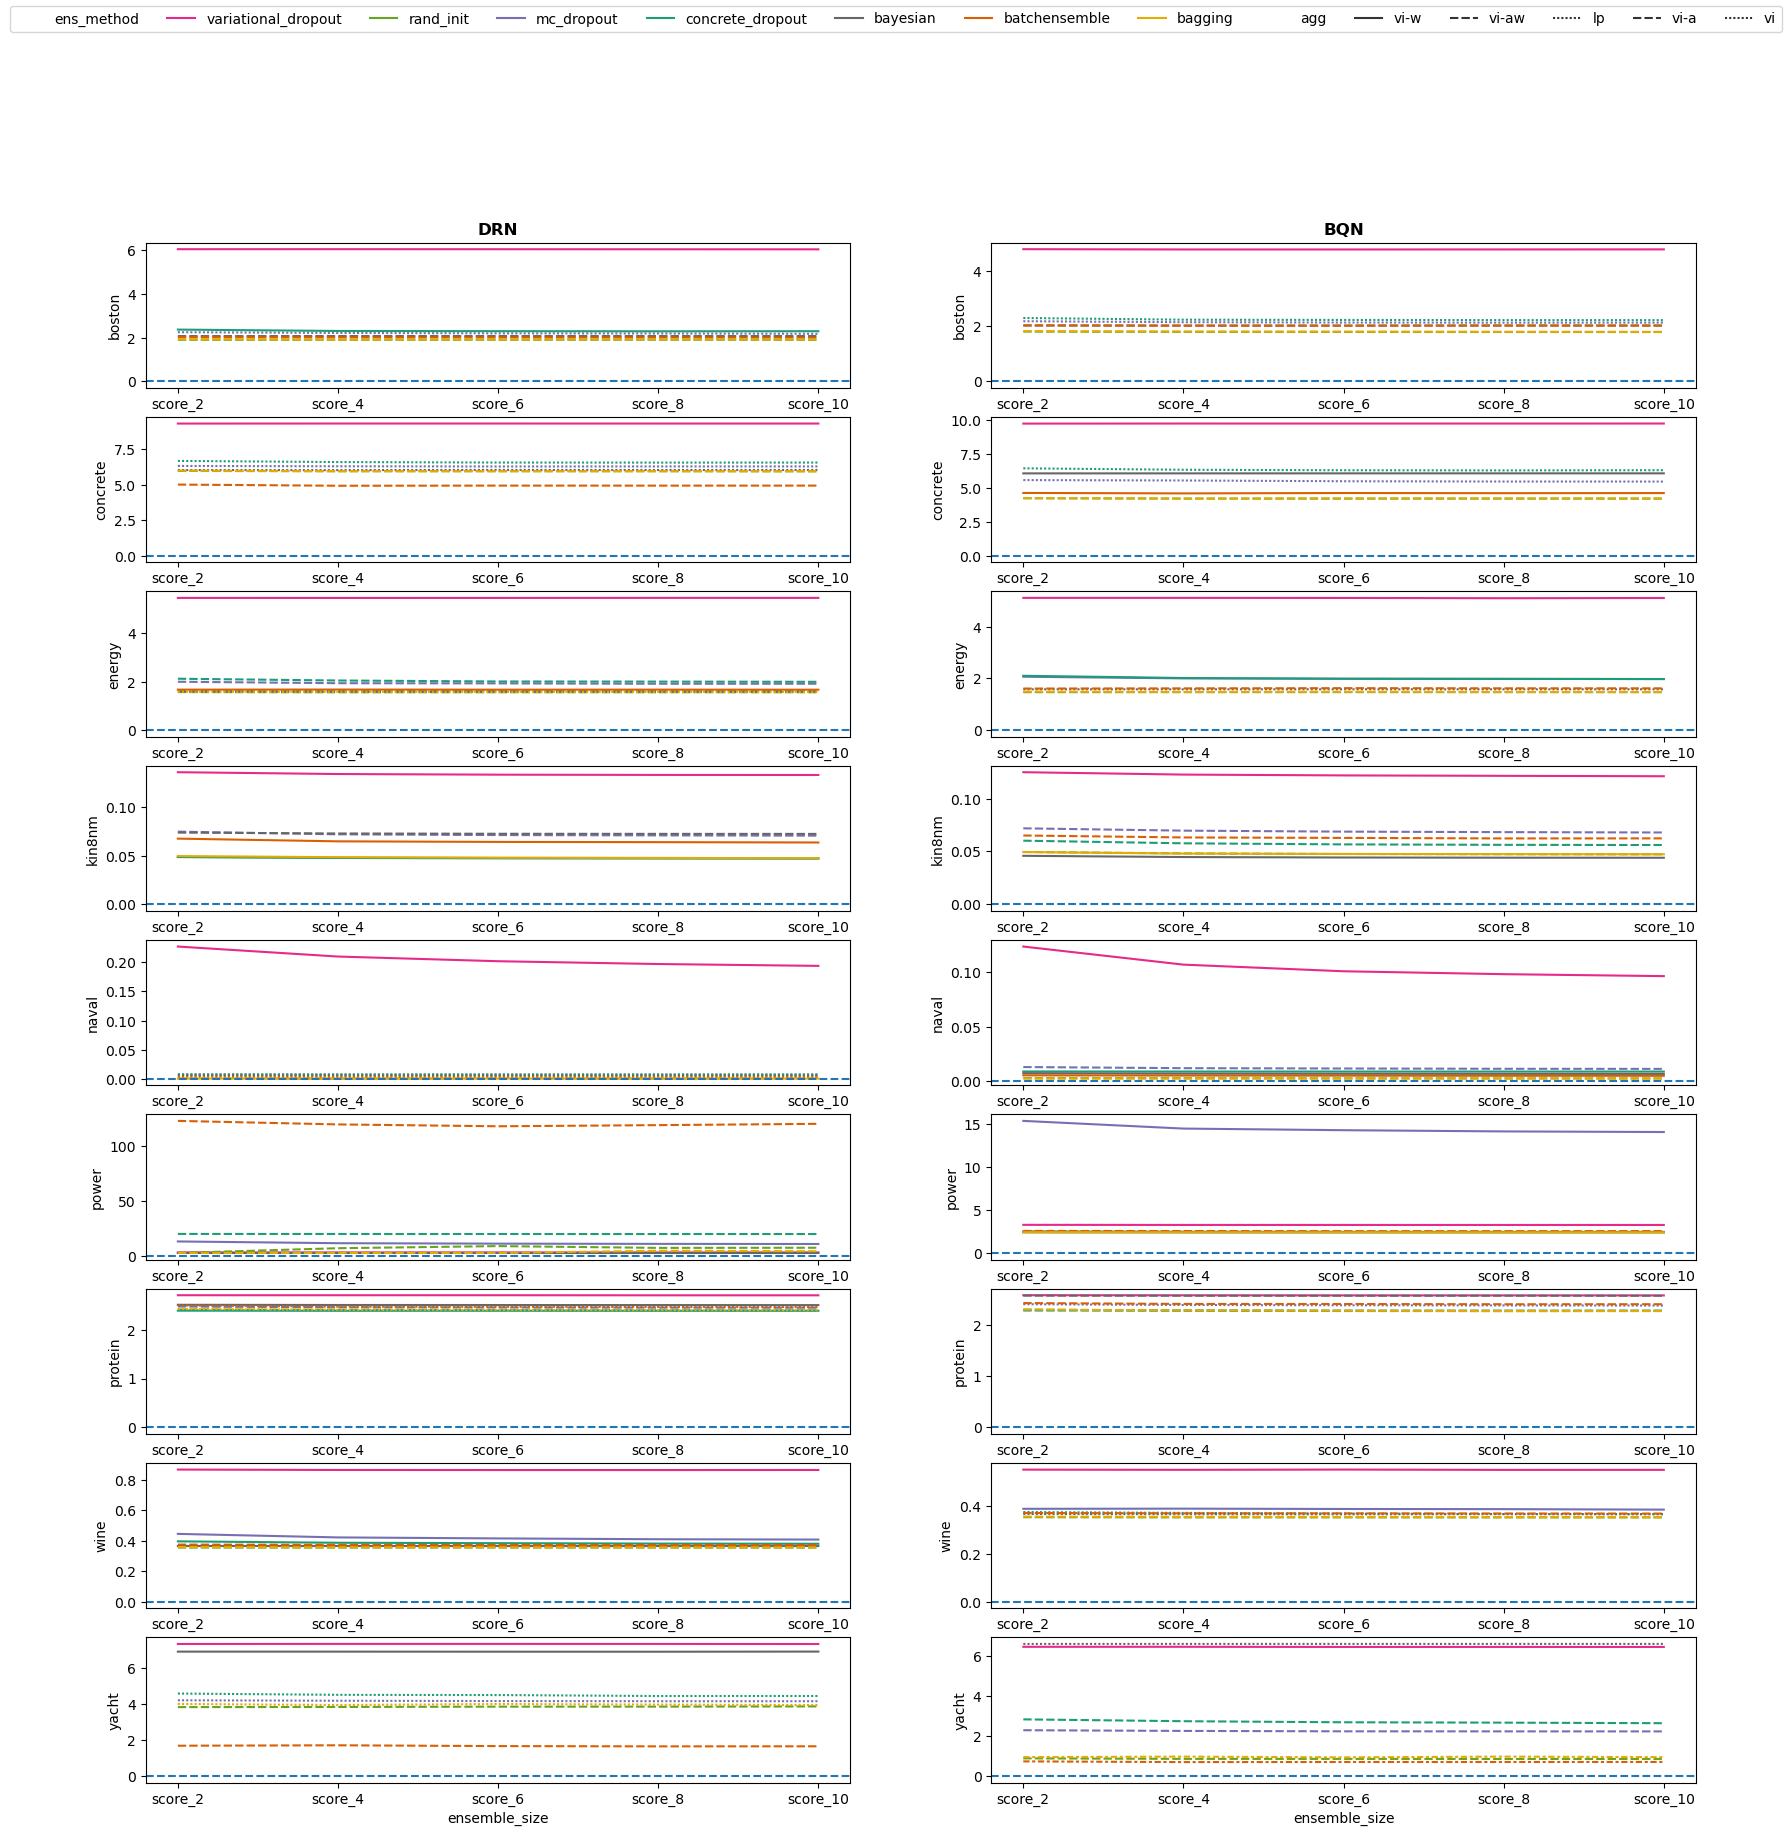

In [32]:
# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(nn_vec), figsize=(20,20), squeeze=False)

# Filter for best 2 aggregation method
df_best_agg = df_scores.sort_values(["dataset", "nn", "ens_method", best_score], ascending=False).groupby(["dataset", "nn", "ens_method"]).head(1)

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    df_nn = df_best_agg[df_best_agg["nn"] == nn]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_nn_dataset = df_nn[(df_nn["dataset"] == dataset)]
        # Melt dataframe for sns plots
        df_melt = pd.melt(df_nn_dataset, id_vars=["ens_method", "dataset", "nn", "agg"], var_name="ensemble_size", value_name="score")
        # Only use skills not differences
        df_final = df_melt[df_melt["ensemble_size"].isin([f"score_{n_ens}" for n_ens in n_ens_vec])]
        
        # Plot boxplots
        g = sns.lineplot(data=df_final, x="ensemble_size", y="score", hue="ens_method", style="agg", ax=axs[i_dataset][i_nn], palette=ens_col)
        
        # Add 0 line
        g.axhline(0, linestyle="--")
        # Add labels to y axis
        axs[i_dataset][i_nn].set_ylabel(dataset)

# Merge subplot legends and displaz figure legend
handles = []
labels = []
for ax in [item for sublist in axs for item in sublist]:
    curr_handles, curr_labels = ax.get_legend_handles_labels()
    for idx, check_label in enumerate(curr_labels):
        if check_label not in labels:
            handles.append(curr_handles[idx])
            labels.append(curr_labels[idx])
    ax.legend([],[], frameon=False)

# Set titles and legends
axs[0][0].set_title("DRN", fontweight="bold")
axs[0][1].set_title("BQN", fontweight="bold")
fig.legend(handles, labels, loc='upper center', ncol=len(labels))
# fig.suptitle(f"Aggregation method {agg_method_to_plot.upper()}, show only Top {top_k}", fontweight="bold")